In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [282]:
df_1=pd.read_csv('download-30.csv')

In [283]:
df_1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [284]:
df_1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [285]:
from datetime import datetime
df_1["YearMonth"] = pd.to_datetime(df_1["YearMonth"], infer_datetime_format=True)

In [286]:
df_1 = df_1.set_index(["YearMonth"])

In [287]:
df_1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [288]:
df_1.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [289]:
df_1a = pd.read_csv("download-30.csv",parse_dates=True,squeeze=True,index_col=0)

In [290]:
df_1a.head(10)

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
1980-06-01    1377
1980-07-01    1966
1980-08-01    2453
1980-09-01    1984
1980-10-01    2596
Name: Sparkling, dtype: int64

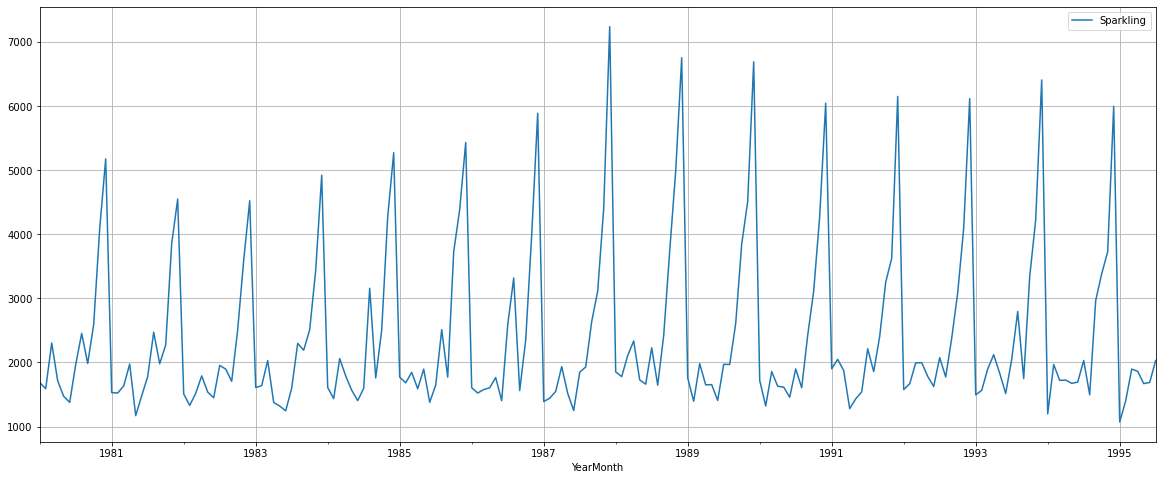

In [291]:
#Plotting Times Series for Sparkling Wine
df_1.plot(figsize=(20,8))
plt.grid();

### Finding Mean, Median, Min and Max of Wine Sales

In [181]:
#Describe Sparkling Wine
round(df_1.describe(),3)

Sparkling
count     187.00
mean     2402.42
std      1295.11
min      1070.00
25%      1605.00
50%      1874.00
75%      2549.00
max      7242.00

In [292]:
## Checking the rows and columns of Sparkling Wine dataset

df_1.shape

(187, 1)

In [293]:
# Checking for Null Values in Sparkling Wine dataset

df_1.isnull().sum()

Sparkling    0
dtype: int64

In [294]:
## Checking the data type Sparkling Wine

df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


### Get all the observations for all months for the year 1990.


In [295]:
# Sparkling Wine
df_1['1990']

Sparkling
YearMonth            
1990-01-01       1720
1990-02-01       1321
1990-03-01       1859
1990-04-01       1628
1990-05-01       1615
1990-06-01       1457
1990-07-01       1899
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

### Plot year on year Wine Sales boxplots

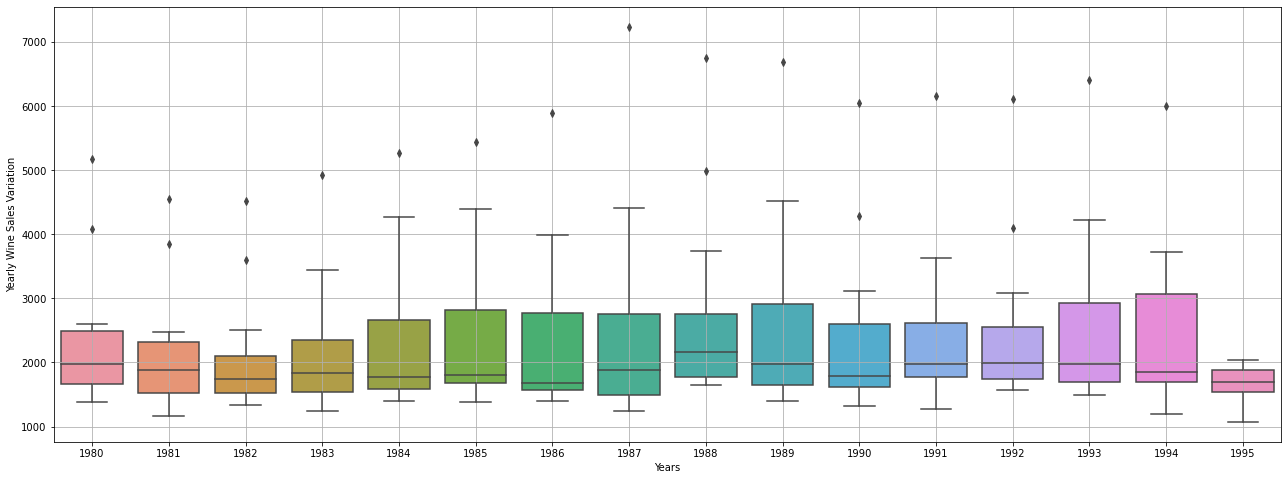

In [296]:
# Sparkling Wine
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1a.index.year, df_1a,whis=1.5) # ax=ax helps in creating multiple subplots.You can also remove, it works
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that both the wine sales do have some outliers for certain years.

## Plot a monthly boxplot for the wine sales taking all the years into account.

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

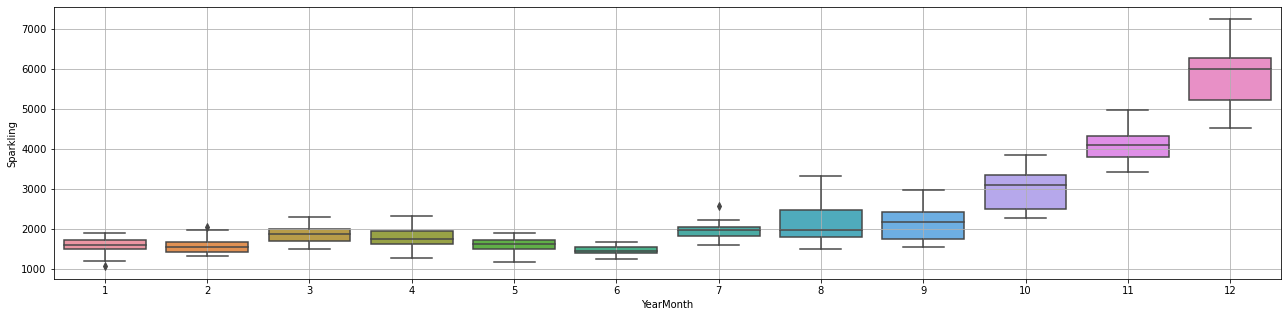

In [297]:
# Series 1
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1a.index.month, df_1a, ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years does show outliers for February & July.

### Plot a monthplot of the give Time Series.

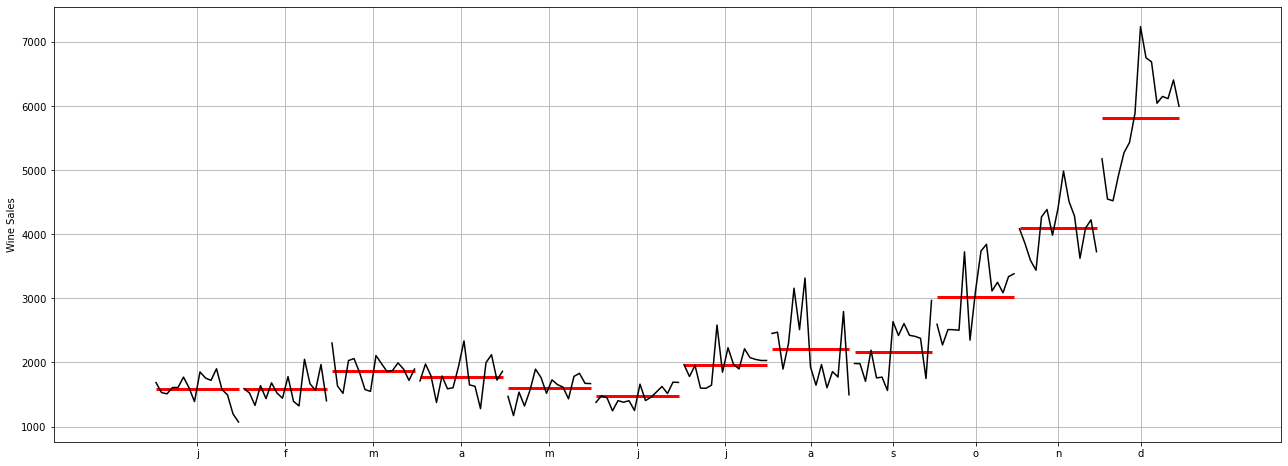

In [298]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1a,ylabel='Wine Sales',ax=ax)
plt.grid();

### Plotting time series of different months of different years sales data

In [299]:
yearly_sales_across_months = pd.pivot_table(df_1, values = 'Sparkling', columns = df_1.index.month, 
                                        index = df_1.index.year)

yearly_sales_across_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980      1686.00 1591.00 2304.00 1712.00 1471.00 1377.00 1966.00 2453.00   
1981      1530.00 1523.00 1633.00 1976.00 1170.00 1480.00 1781.00 2472.00   
1982      1510.00 1329.00 1518.00 1790.00 1537.00 1449.00 1954.00 1897.00   
1983      1609.00 1638.00 2030.00 1375.00 1320.00 1245.00 1600.00 2298.00   
1984      1609.00 1435.00 2061.00 1789.00 1567.00 1404.00 1597.00 3159.00   
1985      1771.00 1682.00 1846.00 1589.00 1896.00 1379.00 1645.00 2512.00   
1986      1606.00 1523.00 1577.00 1605.00 1765.00 1403.00 2584.00 3318.00   
1987      1389.00 1442.00 1548.00 1935.00 1518.00 1250.00 1847.00 1930.00   
1988      1853.00 1779.00 2108.00 2336.00 1728.00 1661.00 2230.00 1645.00   
1989      1757.00 1394.00 1982.00 1650.00 1654.00 1406.00 1971.00 1968.00   
1990      1720.00 1321.00 1859.00 1628.00 1615.00 1457.00 1899.00 1605.00   
1991      1902.00 2049.00 1874.00 1279.00 1432.00 1540.00 2214.00 1857.00   
1992      1577.00 1667.00 1993.00 1997.00 1783.00 1625.00 2076.00 1773.00   
1993      1494.00 1564.00 1898.00 2121.00 1831.00 1515.00 2048.00 2795.00   
1994      1197.00 1968.00 1720.00 1725.00 1674.00 1693.00 2031.00 1495.00   
1995      1070.00 1402.00 1897.00 1862.00 1670.00 1688.00 2031.00     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980      1984.00 2596.00 4087.00 5179.00  
1981      1981.00 2273.00 3857.00 4551.00  
1982      1706.00 2514.00 3593.00 4524.00  
1983      2191.00 2511.00 3440.00 4923.00  
1984      1759.00 2504.00 4273.00 5274.00  
1985      1771.00 3727.00 4388.00 5434.00  
1986      1562.00 2349.00 3987.00 5891.00  
1987      2638.00 3114.00 4405.00 7242.00  
1988      2421.00 3740.00 4988.00 6757.00  
1989      2608.00 3845.00 4514.00 6694.00  
1990      2424.00 3116.00 4286.00 6047.00  
1991      2408.00 3252.00 3627.00 6153.00  
1992      2377.00 3088.00 4096.00 6119.00  
1993      1749.00 3339.00 4227.00 6410.00  
1994      2968.00 3385.00 3729.00 5999.00  
1995          NaN     NaN     NaN     NaN

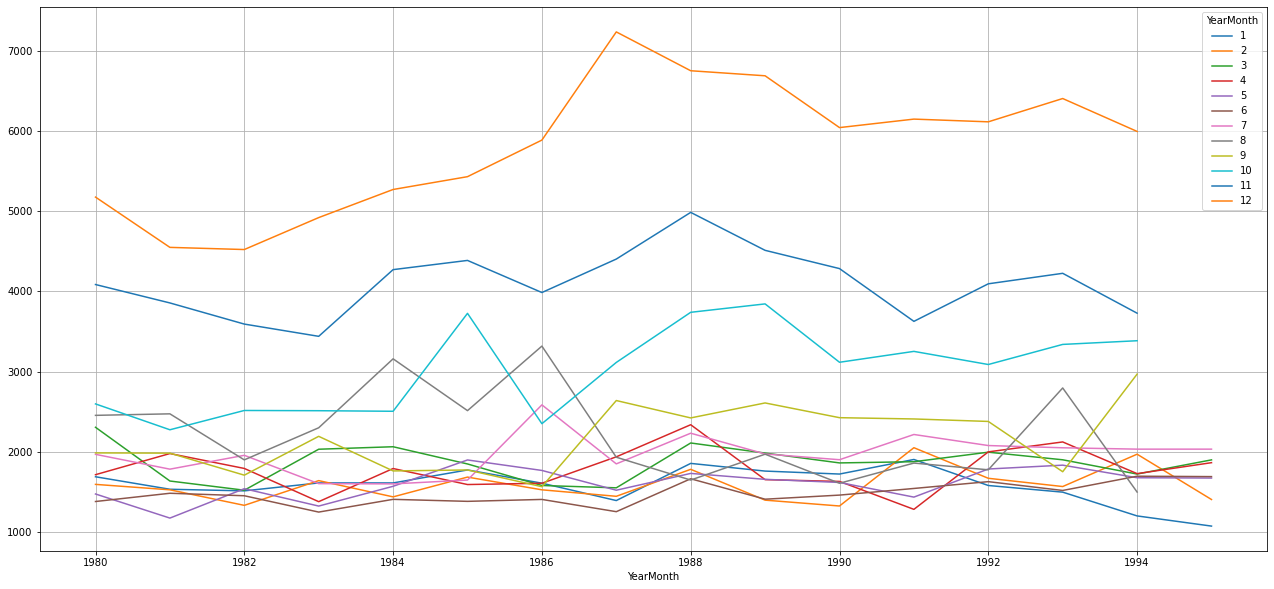

In [300]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

## Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.


### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [301]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

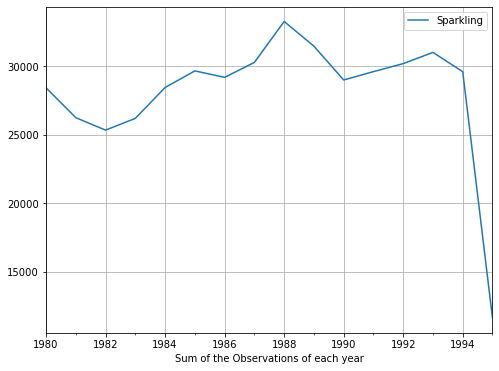

In [302]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [303]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

Sparkling
YearMonth            
1980-12-31    2367.17
1981-12-31    2185.58
1982-12-31    2110.08
1983-12-31    2181.67
1984-12-31    2369.25

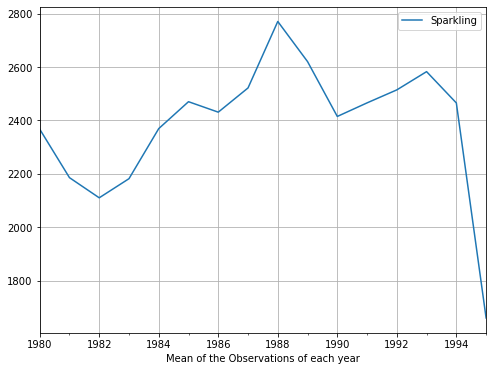

In [304]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

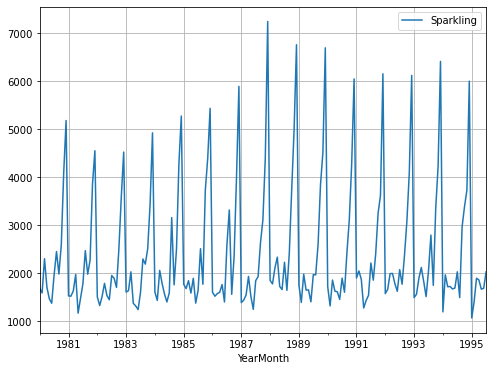

In [305]:
df_1.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

### Quarterly Plot

In [306]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

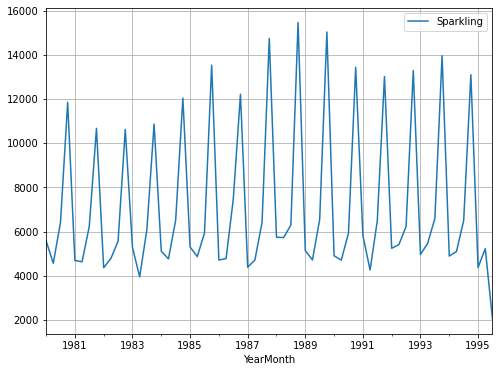

In [307]:
df_quarterly_sum.plot();
plt.grid()

In [308]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
YearMonth            
1980-03-31    1860.33
1980-06-30    1520.00
1980-09-30    2134.33
1980-12-31    3954.00
1981-03-31    1562.00

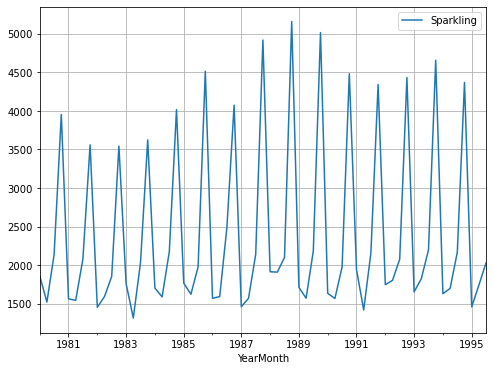

In [309]:
df_quarterly_mean.plot();
plt.grid()

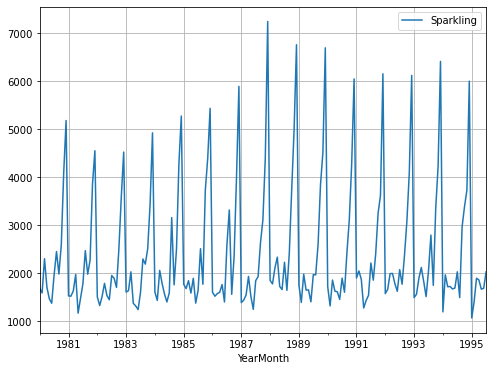

In [310]:
df_1.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [311]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

Sparkling
YearMonth            
1980-01-01       1686
1980-01-02          0
1980-01-03          0
1980-01-04          0
1980-01-05          0
...               ...
1995-06-27          0
1995-06-28          0
1995-06-29          0
1995-06-30          0
1995-07-01       2031

[5661 rows x 1 columns]

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

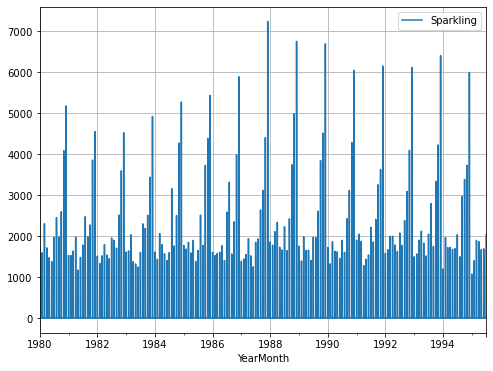

In [312]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

### Decade Plot

In [313]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

Sparkling
YearMonth            
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

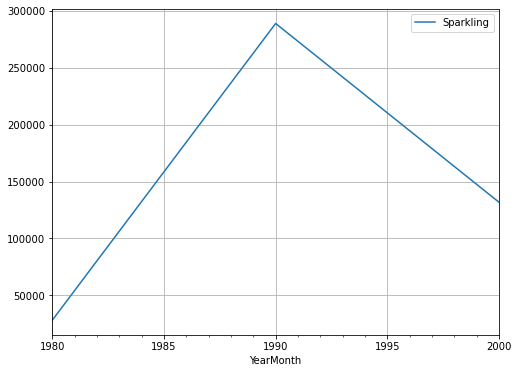

In [314]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

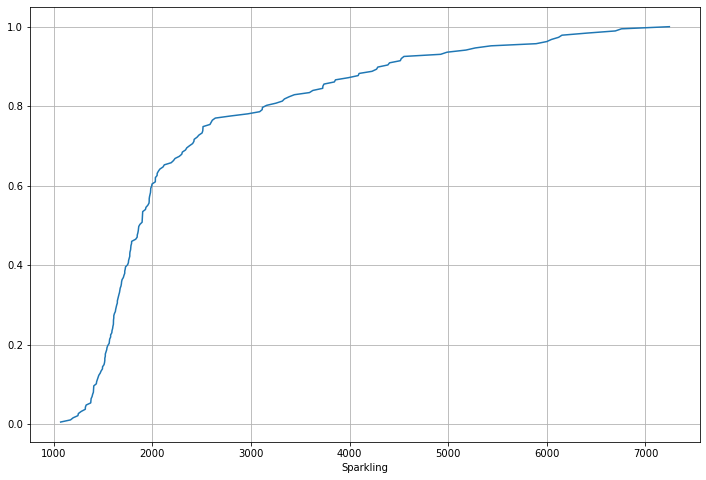

In [315]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 8))
cdf = ECDF(df_1['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

This particular graph tells us what percentage of data points refer to what number of Sales. 60% of the sales are below 2000. Maximum sales is close 7000

## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

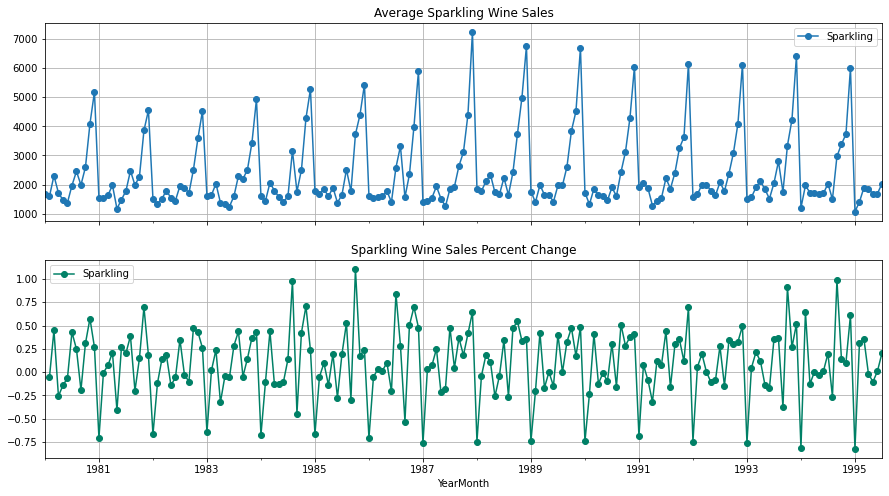

In [316]:
# group by date and get average RetailSales, and precent change
average    = df_1.groupby(df_1.index)["Sparkling"].mean()
pct_change = df_1.groupby(df_1.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

# Decompose the Time Series

### Additive Model

In [317]:
from statsmodels.tsa.seasonal import seasonal_decompose

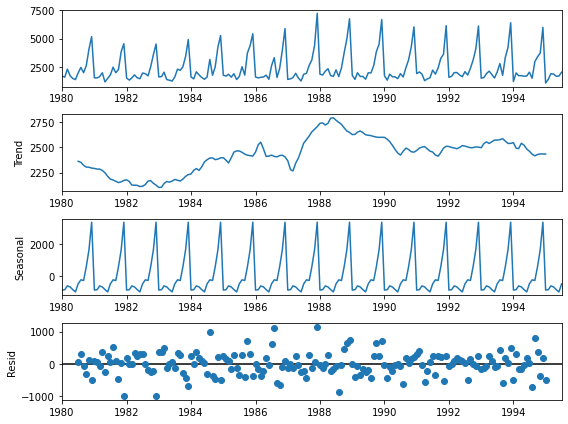

In [318]:
from pylab import rcParams
rcParams['figure.figsize'] =8,6
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

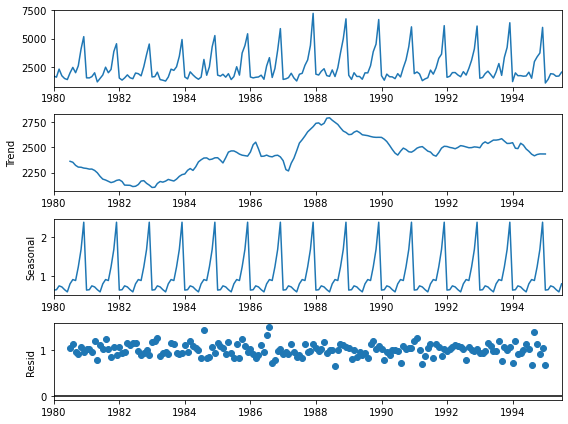

In [319]:
decomposition = seasonal_decompose(df_1,model='multiplicative')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

In [320]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [321]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01   2360.67
1980-08-01   2351.33
1980-09-01   2320.54
1980-10-01   2303.58
1980-11-01   2302.04
1980-12-01   2293.79
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   0.65
1980-02-01   0.66
1980-03-01   0.76
1980-04-01   0.73
1980-05-01   0.66
1980-06-01   0.60
1980-07-01   0.81
1980-08-01   0.92
1980-09-01   0.89
1980-10-01   1.24
1980-11-01   1.69
1980-12-01   2.38
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01    NaN
1980-02-01    NaN
1980-03-01    NaN
1980-04-01    NaN
1980-05-01    NaN
1980-06-01    NaN
1980-07-01   1.03
1980-08-01   1.14
1980-09-01   0.96
1980-10-01   0.91
1980-11-01   1.05
1980-12-01   0.95
Name: resid, dtype: float64 



In [322]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01   2361.70
1980-08-01   2352.47
1980-09-01   2321.50
1980-10-01   2304.49
1980-11-01   2303.09
1980-12-01   2294.74
dtype: float64

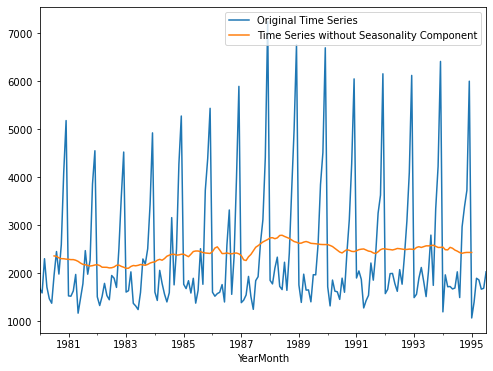

In [323]:
## Ploting without seasonality component
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [324]:
deaseasonalized_ts1 = trend 
deaseasonalized_ts1.head(12)

YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01   2360.67
1980-08-01   2351.33
1980-09-01   2320.54
1980-10-01   2303.58
1980-11-01   2302.04
1980-12-01   2293.79
Name: trend, dtype: float64

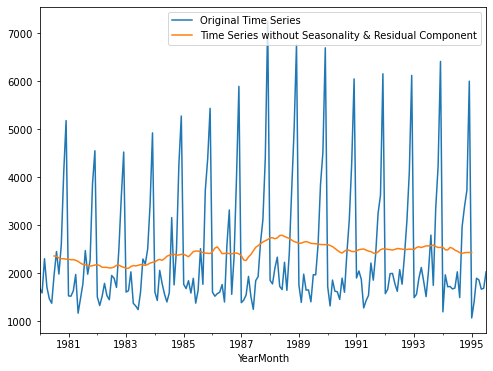

In [326]:
# Ploting without seasonality component and residual
df_1.plot()
deaseasonalized_ts1.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality & Residual Component"]);

## Split the data into train and test and plot the training and test data.


In [327]:
train    =   df_1[0:int(len(df_1)*0.71)] 
test     =   df_1[int(len(df_1)*0.71):]

In [328]:
train

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

[132 rows x 1 columns]

In [329]:
test

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432
1991-06-01       1540
1991-07-01       2214
1991-08-01       1857
1991-09-01       2408
1991-10-01       3252
1991-11-01       3627
1991-12-01       6153
1992-01-01       1577
1992-02-01       1667
1992-03-01       1993
1992-04-01       1997
1992-05-01       1783
1992-06-01       1625
1992-07-01       2076
1992-08-01       1773
1992-09-01       2377
1992-10-01       3088
1992-11-01       4096
1992-12-01       6119
1993-01-01       1494
1993-02-01       1564
1993-03-01       1898
1993-04-01       2121
1993-05-01       1831
1993-06-01       1515
1993-07-01       2048
1993-08-01       2795
1993-09-01       1749
1993-10-01       3339
1993-11-01       4227
1993-12-01       6410
1994-01-01       1197
1994-02-01       1968
1994-03-01       1720
1994-04-01       1725
1994-05-01       1674
1994-06-01       1693
1994-07-01       2031
1994-08-01       1495
1994-09-01       2968
1994-10-01       3385
1994-11-01       3729
1994-12-01       5999
1995-01-01       1070
1995-02-01       1402
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [330]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [331]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



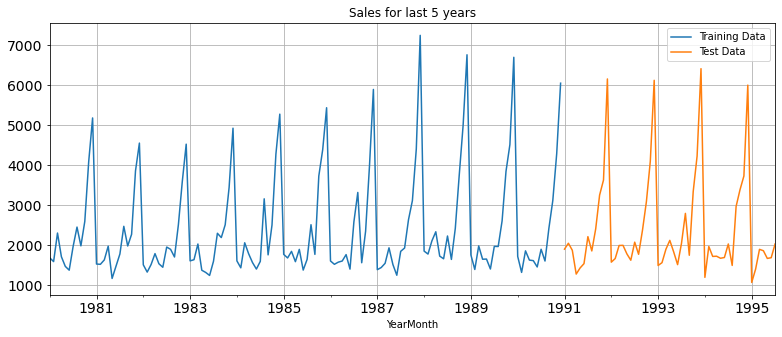

In [332]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Sales for last 5 years")
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

## Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression


For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [333]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [334]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [335]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [336]:
from sklearn.linear_model import LinearRegression

In [337]:
lr = LinearRegression()

In [338]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

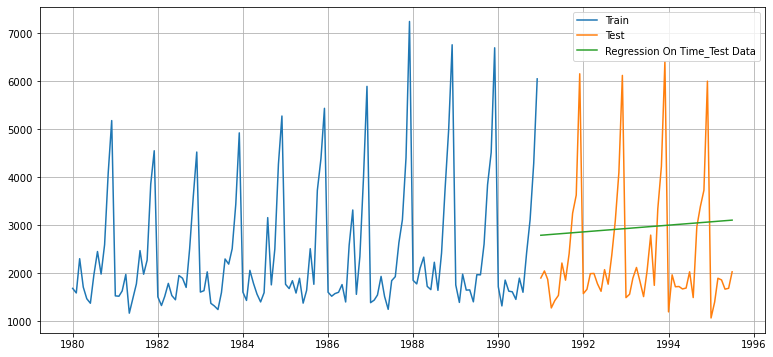

In [339]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [340]:
from sklearn import metrics

## Model Evaluation

In [341]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [342]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime    1389.14

## Model Naive Approach
 

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.¶

In [343]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [344]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

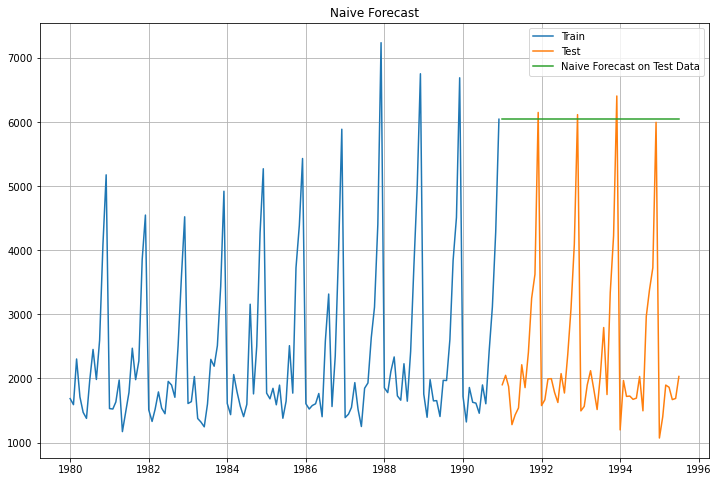

In [345]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

## Model Evaluation

In [346]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [347]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime    1389.14
NaiveModel          3864.28

## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [348]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [349]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902        2403.78
1991-02-01       2049        2403.78
1991-03-01       1874        2403.78
1991-04-01       1279        2403.78
1991-05-01       1432        2403.78

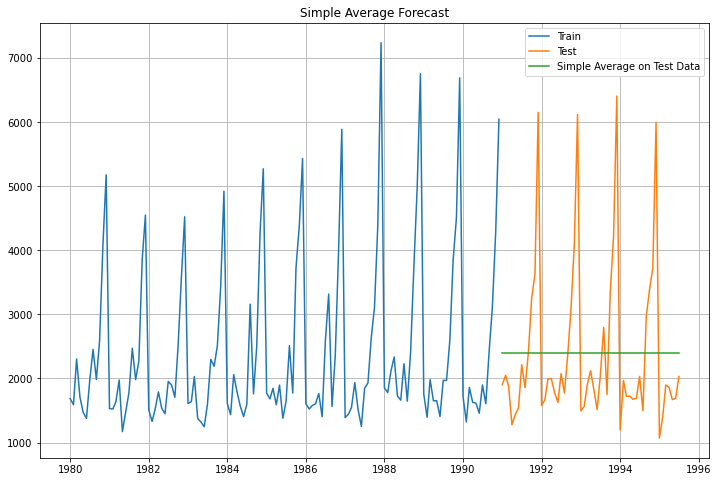

In [350]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

## Model Evaluation

In [351]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [352]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime      1389.14
NaiveModel            3864.28
SimpleAverageModel    1275.08

## Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [353]:
MovingAverage = df_1.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Trailing moving averages

In [354]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_3  Trailing_4  Trailing_6  \
YearMonth                                                               
1980-01-01       1686         NaN         NaN         NaN         NaN   
1980-02-01       1591     1638.50         NaN         NaN         NaN   
1980-03-01       2304     1947.50     1860.33         NaN         NaN   
1980-04-01       1712     2008.00     1869.00     1823.25         NaN   
1980-05-01       1471     1591.50     1829.00     1769.50         NaN   

            Trailing_9  
YearMonth               
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN

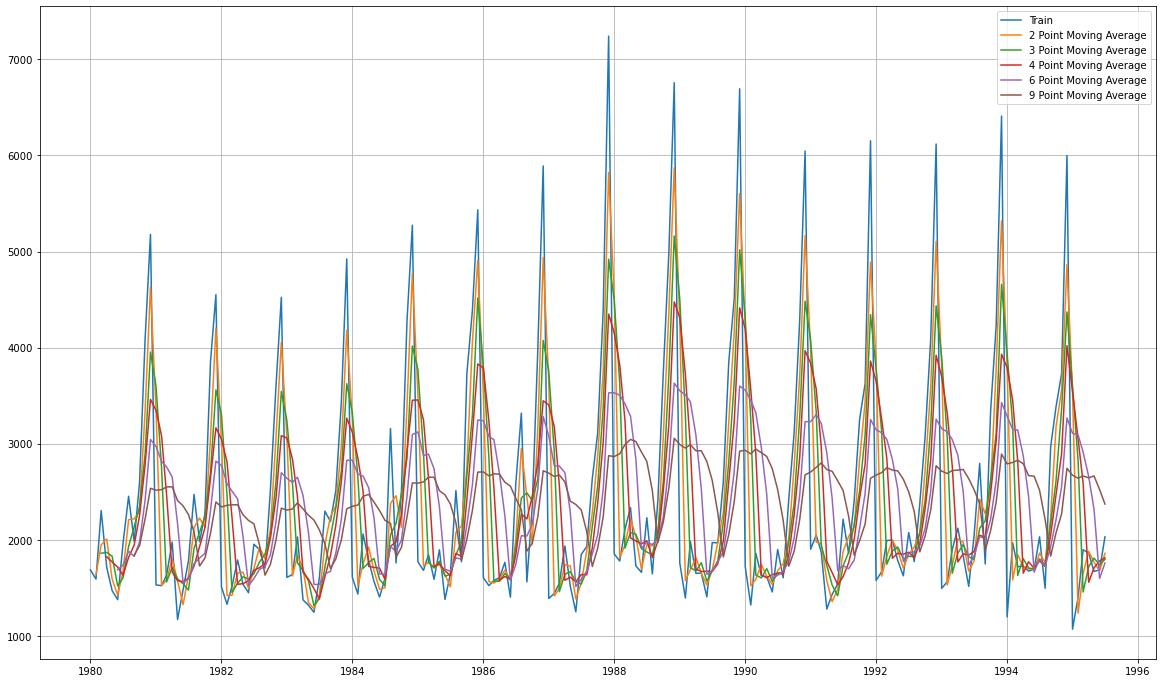

In [355]:
## Plotting on the whole data

plt.figure(figsize=(20,12))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [356]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

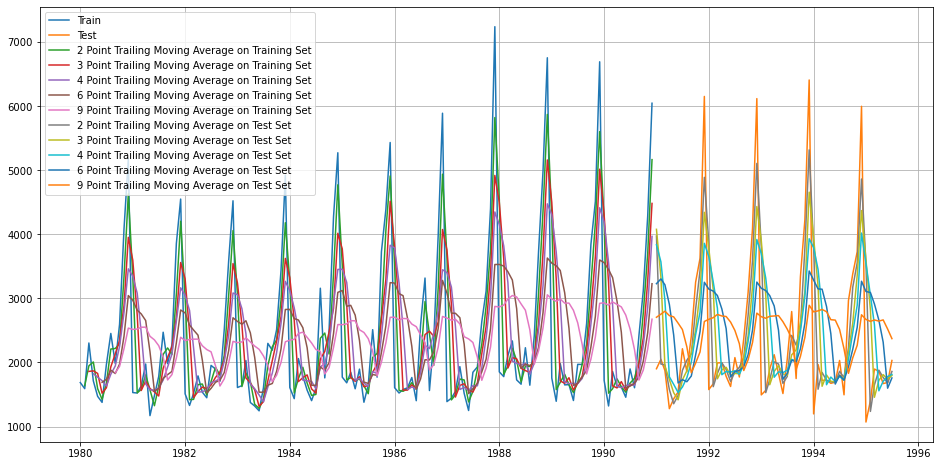

In [357]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [358]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 1028.606
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [359]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_3,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime               1389.14
NaiveModel                     3864.28
SimpleAverageModel             1275.08
2pointTrailingMovingAverage     813.40
3pointTrailingMovingAverage    1028.61
4pointTrailingMovingAverage    1156.59
6pointTrailingMovingAverage    1283.93
9pointTrailingMovingAverage    1346.28

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

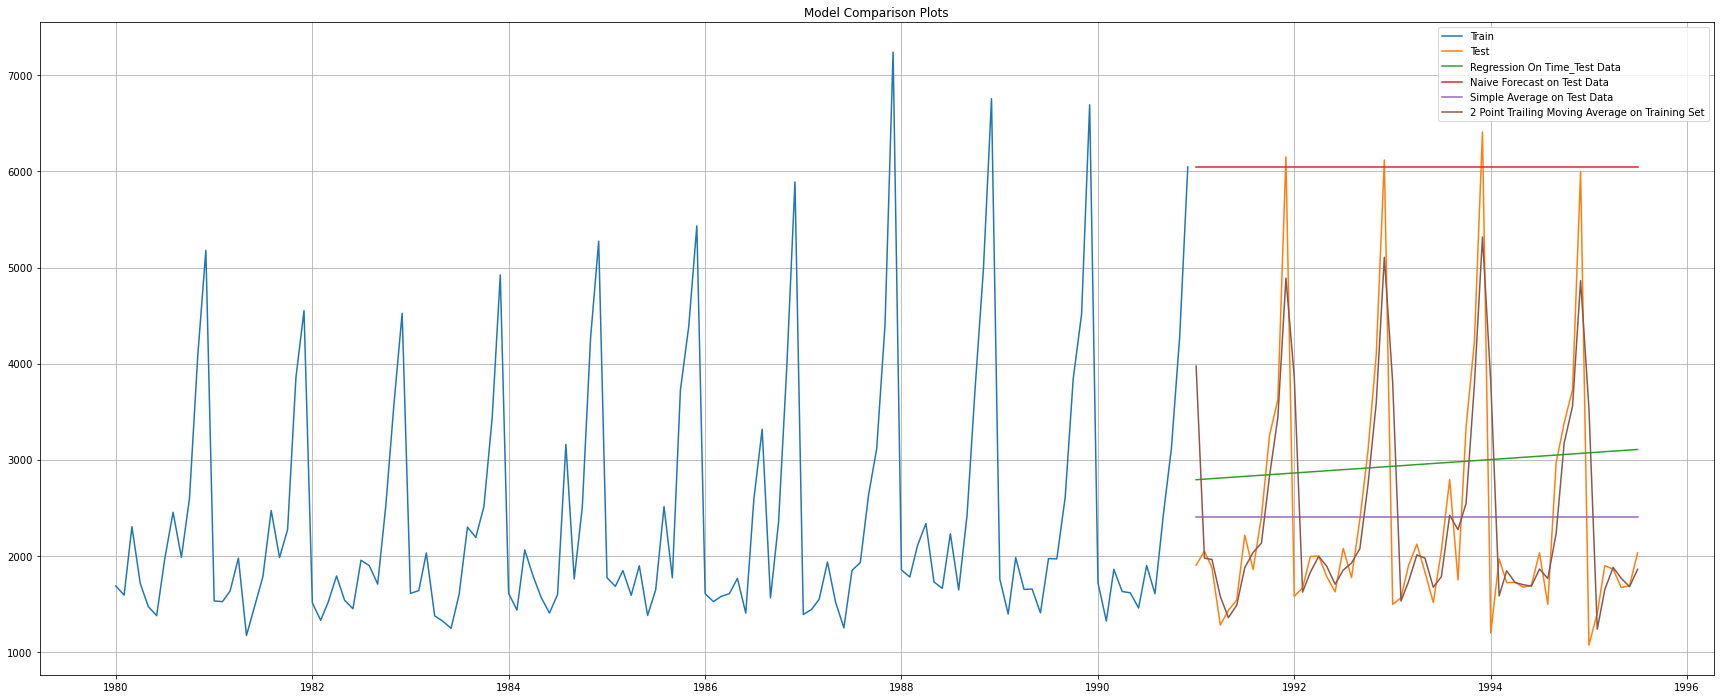

In [360]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [361]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [362]:
SES_train = train.copy()
SES_test = test.copy()

In [363]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [364]:
model_SES_autofit = model_SES.fit(optimized=True)

In [365]:
model_SES_autofit.params

{'smoothing_level': 0.049606598807459296,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435304,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [366]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
SES_test.head()

Sparkling  predict
YearMonth                     
1991-01-01       1902  2724.93
1991-02-01       2049  2724.93
1991-03-01       1874  2724.93
1991-04-01       1279  2724.93
1991-05-01       1432  2724.93

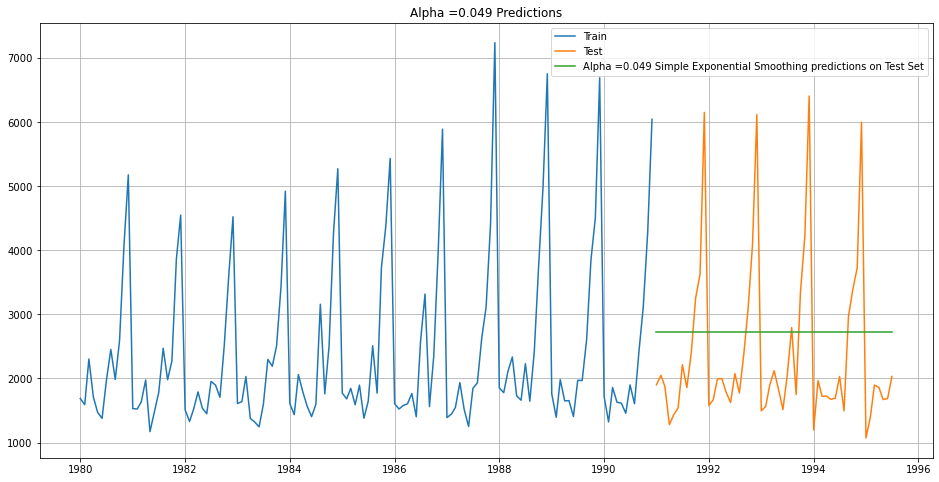

In [367]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

Model Evaluation for  𝛼
α
  = 0.049 : Simple Exponential Smoothing

In [368]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))



For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [369]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.049,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                          1389.14
NaiveModel                                3864.28
SimpleAverageModel                        1275.08
2pointTrailingMovingAverage                813.40
3pointTrailingMovingAverage               1028.61
4pointTrailingMovingAverage               1156.59
6pointTrailingMovingAverage               1283.93
9pointTrailingMovingAverage               1346.28
Alpha=0.049,SimpleExponentialSmoothing    1316.03

Setting different alpha values

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [370]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [371]:

for i in np.arange(0,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [372]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).head(10)

Alpha Values  Train RMSE  Test RMSE
2           0.02     1328.41    1279.50
1           0.01     1362.00    1281.03
3           0.03     1318.85    1293.11
4           0.04     1317.14    1305.46
5           0.05     1318.43    1316.41
6           0.06     1320.98    1326.92
7           0.07     1324.06    1337.68
8           0.08     1327.34    1349.16
9           0.09     1330.65    1361.66
10          0.10     1333.87    1375.39

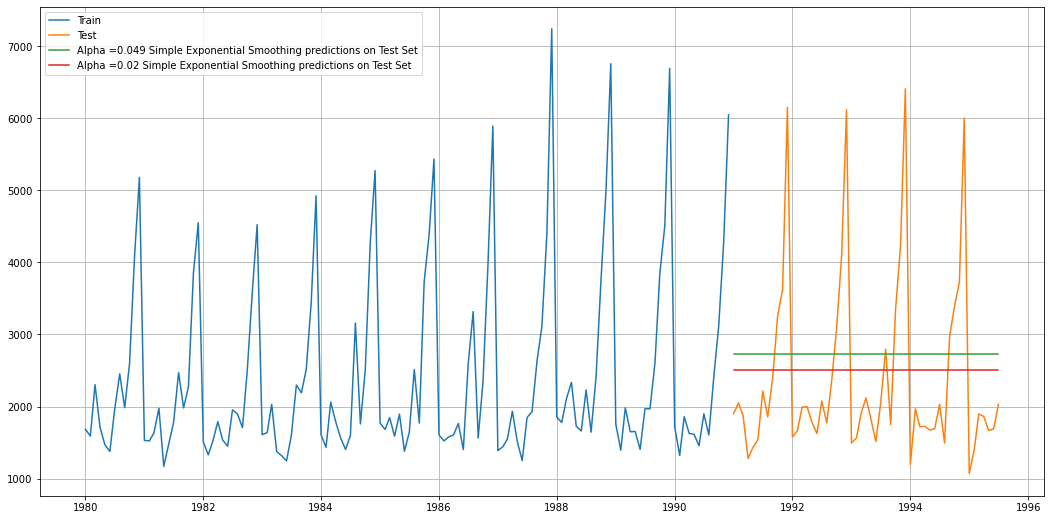

In [373]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [374]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.02,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                          1389.14
NaiveModel                                3864.28
SimpleAverageModel                        1275.08
2pointTrailingMovingAverage                813.40
3pointTrailingMovingAverage               1028.61
4pointTrailingMovingAverage               1156.59
6pointTrailingMovingAverage               1283.93
9pointTrailingMovingAverage               1346.28
Alpha=0.049,SimpleExponentialSmoothing    1316.03
Alpha=0.02,SimpleExponentialSmoothing     1279.50

## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [375]:
DES_train = train.copy()
DES_test = test.copy()

In [376]:
model_DES = Holt(DES_train['Sparkling'])

In [377]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [391]:
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [392]:
resultsDf_7.sort_values(by=['Test RMSE']).head(10)

Alpha Values  Beta Values  Train RMSE  Test RMSE
250            0.02         0.50     1414.59    1274.63
10250          0.02         0.50     1414.59    1274.63
217            0.02         0.17     1488.67    1275.11
10217          0.02         0.17     1488.67    1275.11
357            0.03         0.57     1438.85    1276.03
10357          0.03         0.57     1438.85    1276.03
358            0.03         0.58     1441.36    1278.43
10358          0.03         0.58     1441.36    1278.43
356            0.03         0.56     1436.27    1278.59
10356          0.03         0.56     1436.27    1278.59

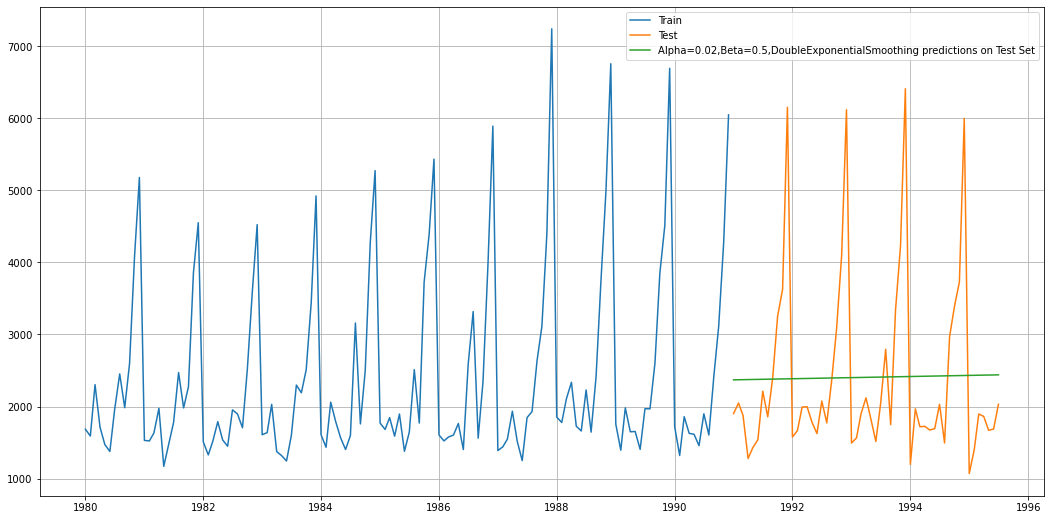

In [380]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.02, 0.50], label='Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [381]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                  1389.14
NaiveModel                                        3864.28
SimpleAverageModel                                1275.08
2pointTrailingMovingAverage                        813.40
3pointTrailingMovingAverage                       1028.61
4pointTrailingMovingAverage                       1156.59
6pointTrailingMovingAverage                       1283.93
9pointTrailingMovingAverage                       1346.28
Alpha=0.049,SimpleExponentialSmoothing            1316.03
Alpha=0.02,SimpleExponentialSmoothing             1279.50
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing    1274.63

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼
α
 ,  𝛽
β
  and  𝛾
γ
  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [393]:
TES_train = train.copy()
TES_test = test.copy()

In [394]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

In [395]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters

In [396]:
model_TES_autofit.params

{'smoothing_level': 0.11107193639676448,
 'smoothing_trend': 0.06170661554551025,
 'smoothing_seasonal': 0.39507938025204126,
 'damping_trend': nan,
 'initial_level': 1640.0001849429073,
 'initial_trend': -15.111380527844805,
 'initial_seasons': array([1.03314765, 0.98921937, 1.40520416, 1.20124958, 0.93920975,
        0.95169819, 1.29579418, 1.68037583, 1.35792845, 1.79419758,
        2.82688557, 3.60017043]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [397]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902       1577.25
1991-02-01       2049       1333.62
1991-03-01       1874       1746.04
1991-04-01       1279       1630.57
1991-05-01       1432       1523.31

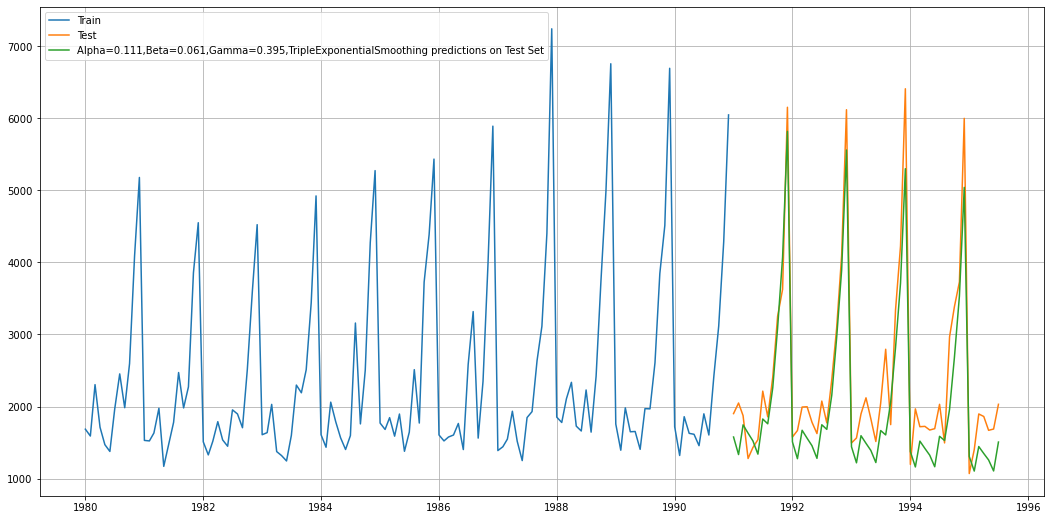

In [398]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [399]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.592


In [400]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
3pointTrailingMovingAverage                           1028.61
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.049,SimpleExponentialSmoothing                1316.03
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing        1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59

In [401]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [402]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.01,1,0.01):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [403]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head(10)

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
2692          0.40         0.03          0.20      381.20     311.34
2701          0.40         0.04          0.20      382.06     312.29
2728          0.40         0.07          0.20      385.80     313.08
2710          0.40         0.05          0.20      383.21     313.24
2719          0.40         0.06          0.20      384.48     313.25
3574          0.50         0.02          0.20      388.47     313.69
2737          0.40         0.08          0.20      387.12     314.91
2683          0.40         0.02          0.20      381.05     314.95
1927          0.30         0.17          0.20      391.84     319.64
1918          0.30         0.16          0.20      390.64     320.77

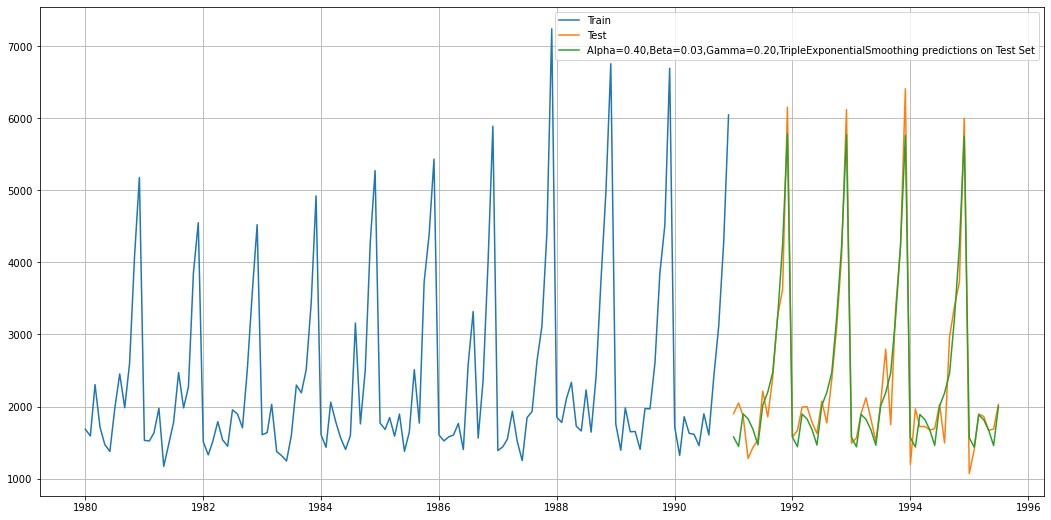

In [404]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.40,0.03, 0.20], label='Alpha=0.40,Beta=0.03,Gamma=0.20,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [405]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=.40,Beta=0.03,Gamma=0.20,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
3pointTrailingMovingAverage                           1028.61
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.049,SimpleExponentialSmoothing                1316.03
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing        1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=.40,Beta=0.03,Gamma=0.20,TripleExponentia...     311.34

In [406]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=.40,Beta=0.03,Gamma=0.20,TripleExponentia...     311.34
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
2pointTrailingMovingAverage                            813.40
3pointTrailingMovingAverage                           1028.61
4pointTrailingMovingAverage                           1156.59
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing        1274.63
SimpleAverageModel                                    1275.08
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
6pointTrailingMovingAverage                           1283.93
Alpha=0.049,SimpleExponentialSmoothing                1316.03
9pointTrailingMovingAverage                           1346.28
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.


### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼
α
  = .04,  𝛽
β
  = 0.03 and  𝛾
γ
  = 0.20¶

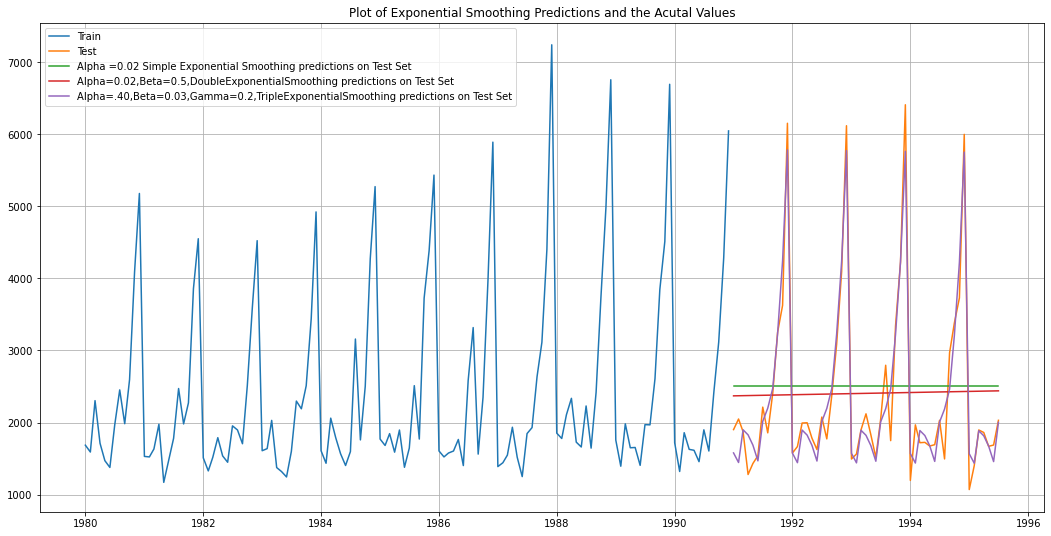

In [407]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.02, 0.5], label='Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.40, 0.03, 0.20], label='Alpha=.40,Beta=0.03,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.
For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).
The two models to be built on the whole data are the following:

**Alpha=0.4,Beta=0.03,Gamma=0.2,TripleExponentialSmoothing**
**Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing**

In [408]:
fullmodel1 = ExponentialSmoothing(df_1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.03,
                                                                 smoothing_seasonal=0.2)

In [409]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_1['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 367.6614781345912


In [410]:
def mape(actual, predicted):
    actual,predicted = np.array(actual),np.array(predicted)
    return np.mean(np.abs((actual-predicted)/actual))*100

mape = mape(df_1['Sparkling'],fullmodel1.fittedvalues)
print('MAPE:', mape)

MAPE: 12.303835731255482


In [411]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

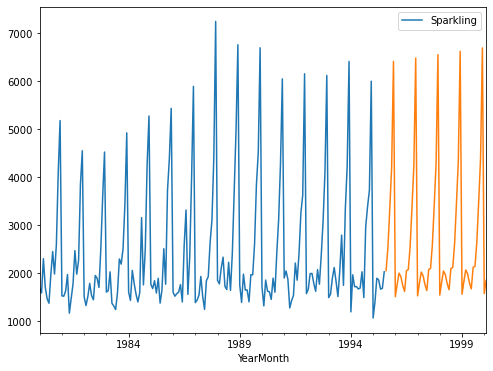

In [412]:
df_1.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [413]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction  upper_ci
1995-08-01   1331.43     2053.69   2775.95
1995-09-01   1816.26     2538.51   3260.77
1995-10-01   2625.26     3347.52   4069.77
1995-11-01   3475.99     4198.24   4920.50
1995-12-01   5687.90     6410.15   7132.41

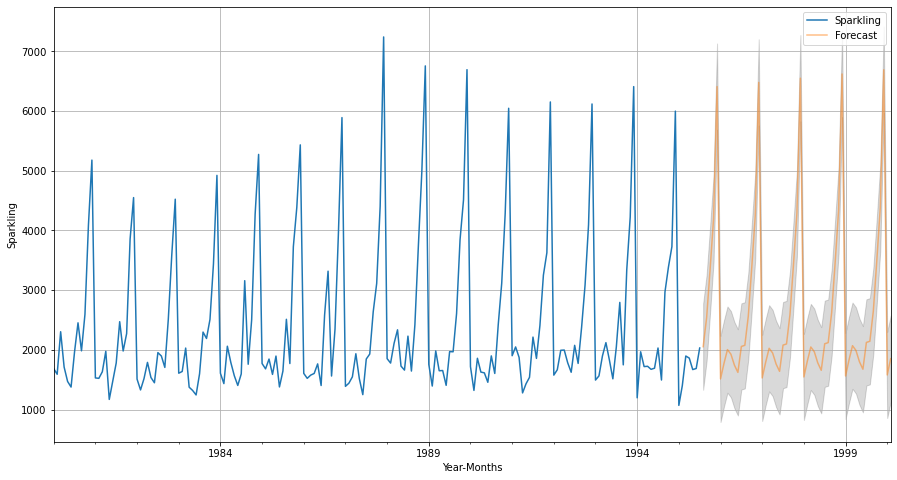

In [414]:
# plot the forecast along with the confidence band

axis = df_1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

In [415]:
fullmodel2 = ExponentialSmoothing(df_1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.061,
                                                                 smoothing_seasonal=0.395)

In [416]:
RMSE_fullmodel2 = metrics.mean_squared_error(df_1['Sparkling'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 353.39727607981985


In [417]:
def mape(actual, predicted):
    actual,predicted = np.array(actual),np.array(predicted)
    return np.mean(np.abs((actual-predicted)/actual))*100

mape = mape(df_1['Sparkling'],fullmodel2.fittedvalues)
print('MAPE:', mape)

MAPE: 11.587809878138016


In [418]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

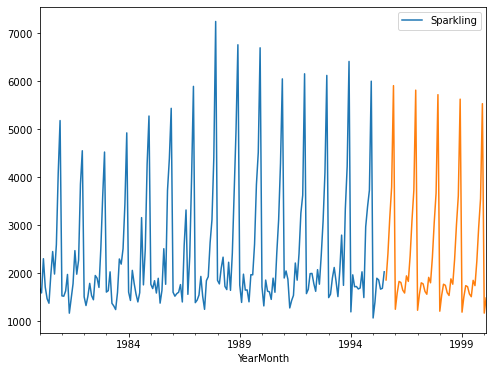

In [419]:
df_1.plot()
prediction_2.plot();

In [420]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

lower_CI  prediction  upper_ci
1995-08-01   1138.95     1861.21   2583.47
1995-09-01   1684.00     2406.26   3128.52
1995-10-01   2437.86     3160.12   3882.38
1995-11-01   3071.19     3793.44   4515.70
1995-12-01   5184.01     5906.27   6628.52

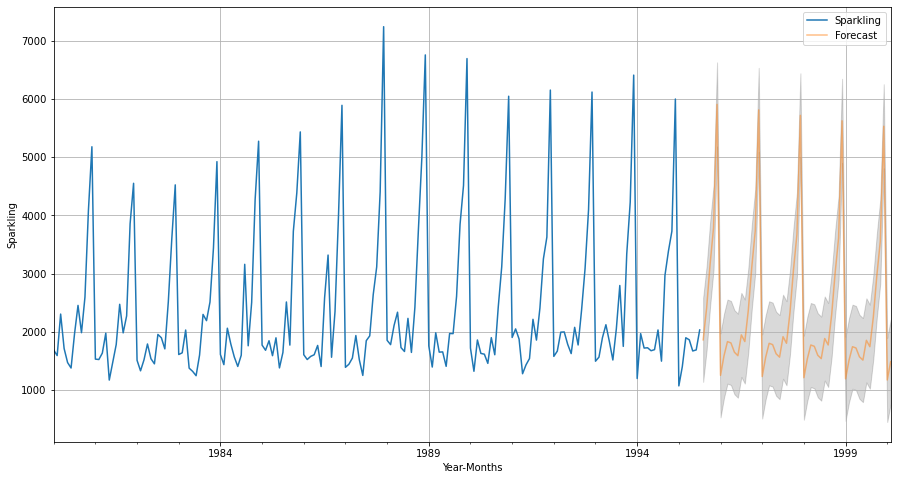

In [421]:
# plot the forecast along with the confidence band

axis = df_1.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

In [422]:
df_1

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

[187 rows x 1 columns]

## Check for stationarity

### Dicky Fuller Test

#### Null Hypothesis H0- Series is not Stationary
#### Alternative Hypothesis H1- Series is Stationary

In [490]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

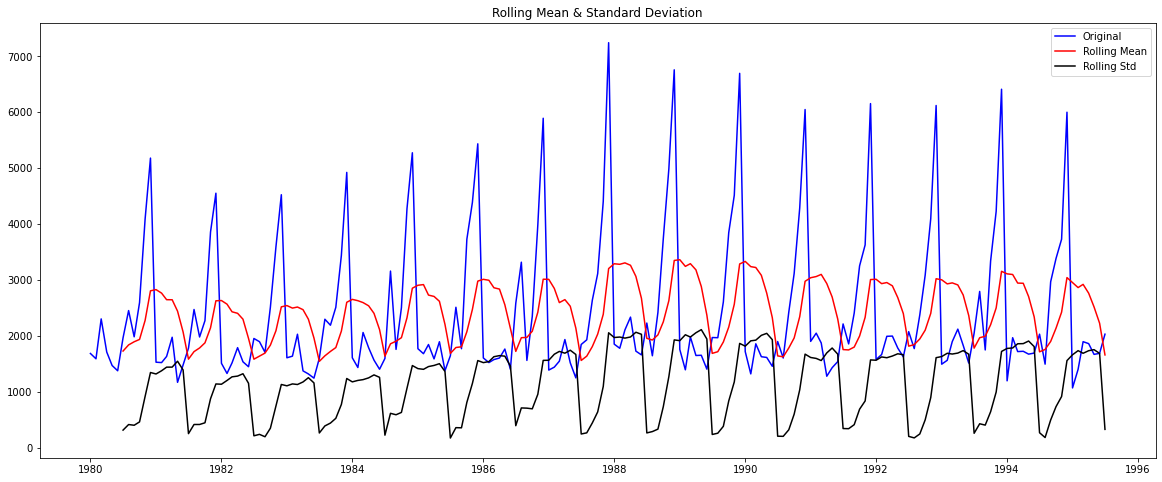

Results of Dickey-Fuller Test:
Test Statistic                 -1.36
p-value                         0.60
#Lags Used                     11.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [491]:
test_stationarity(df_1['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

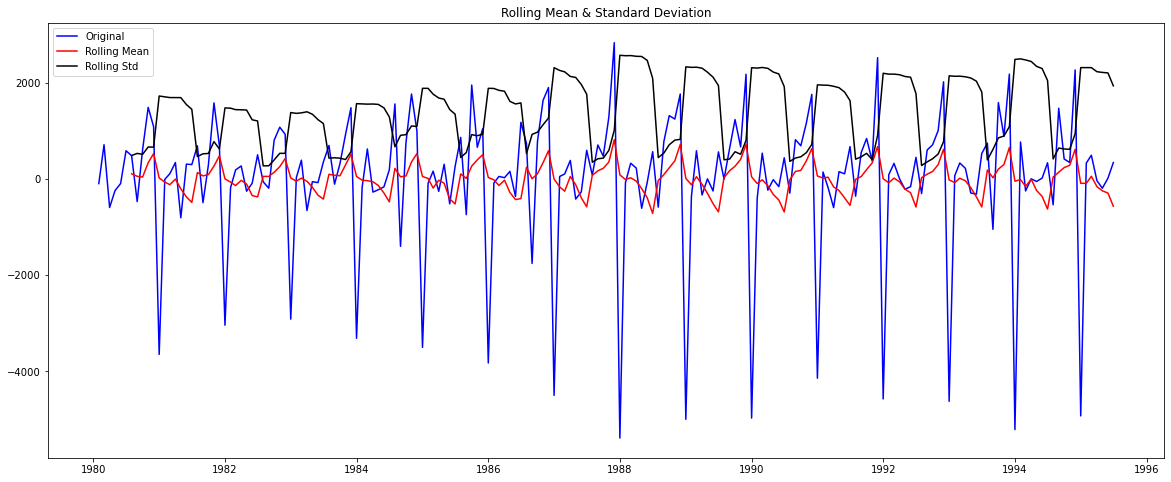

Results of Dickey-Fuller Test:
Test Statistic                -45.05
p-value                         0.00
#Lags Used                     10.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [492]:
test_stationarity(df_1['Sparkling'].diff().dropna())

We see that at  𝛼
α
  = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [493]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

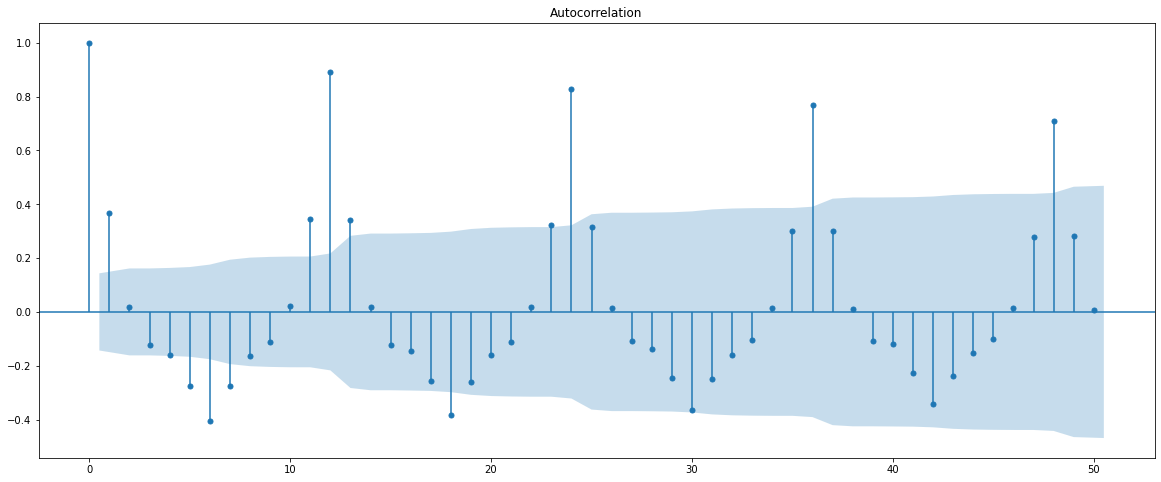

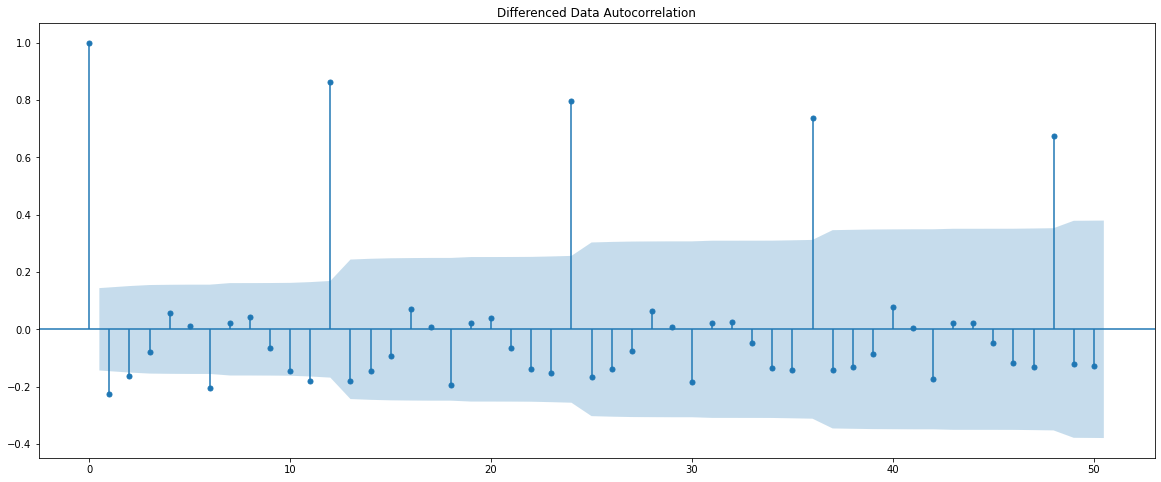

In [494]:
plot_acf(df_1['Sparkling'],lags=50)
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

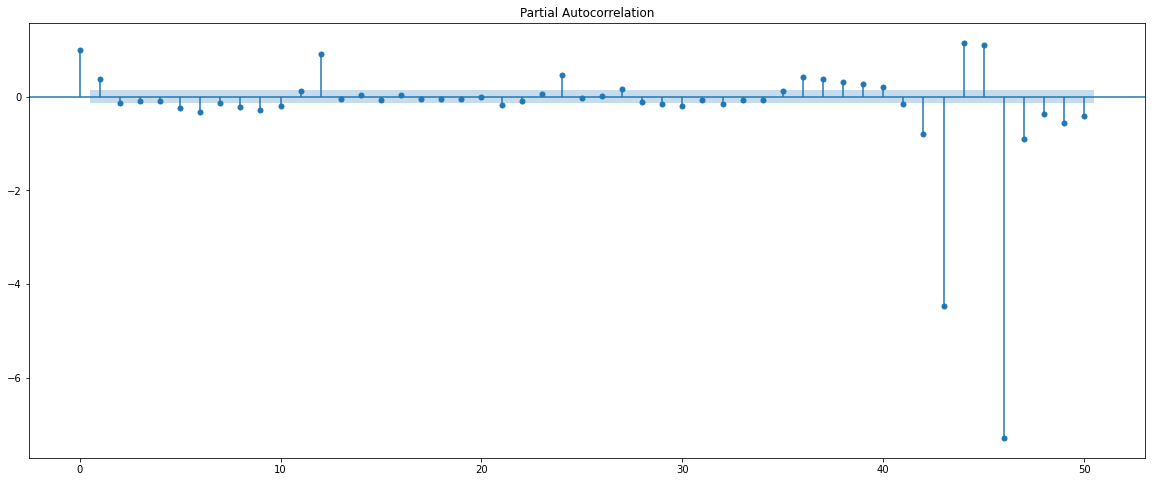

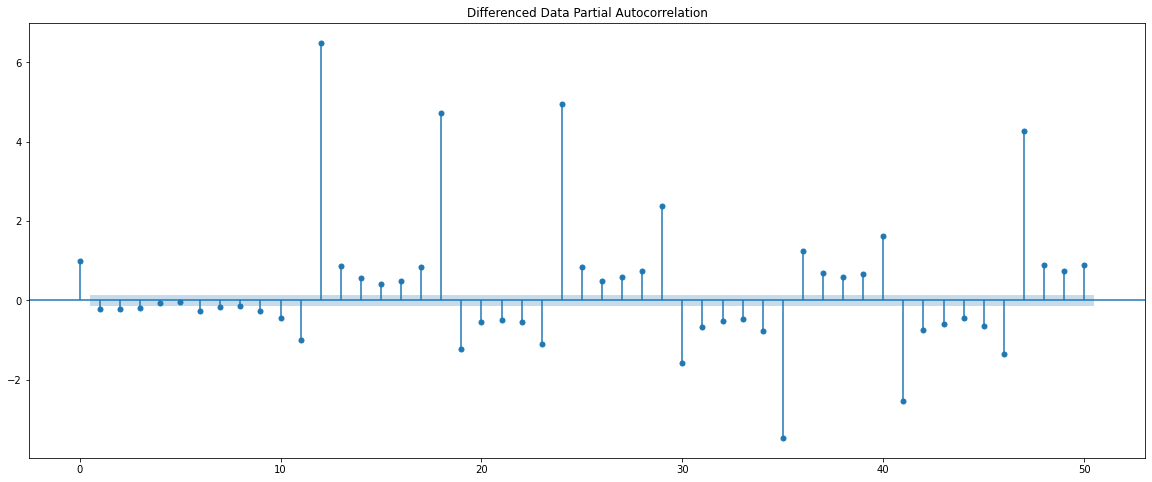

In [495]:
plot_pacf(df_1['Sparkling'],lags=50)
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Split the data into train and test and plot the training and test data.

Training Data is till Dec 1990 . Test Data is from the beginning Jan 1991

In [496]:
train=df_1[df_1.index.year < 1991]
test=df_1[df_1.index.year >= 1991]

In [497]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [498]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [499]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


#### Check for stationarity of the Training Data Time Series.¶

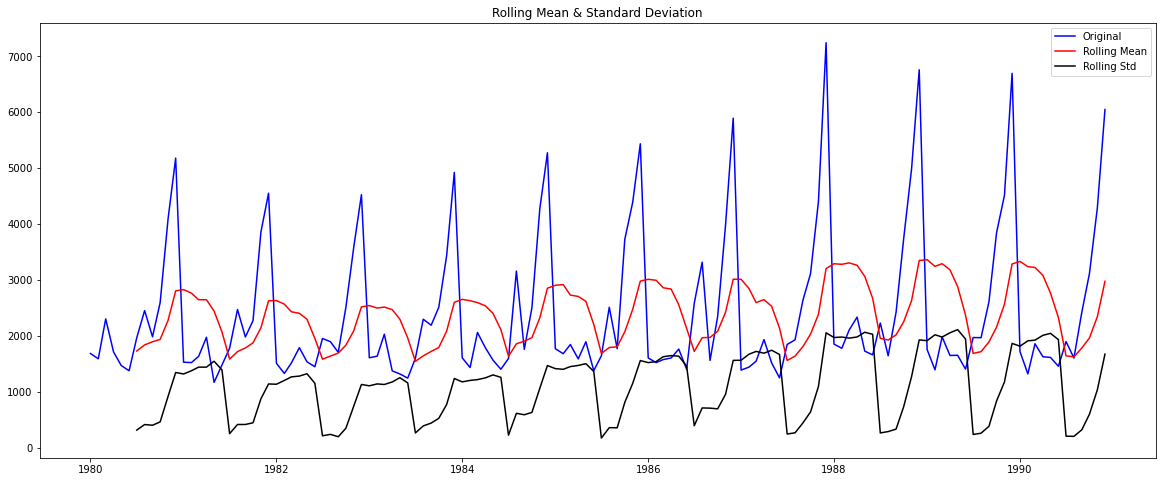

Results of Dickey-Fuller Test:
Test Statistic                 -1.21
p-value                         0.67
#Lags Used                     12.00
Number of Observations Used   119.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [500]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at  𝛼
α
  = 0.05.

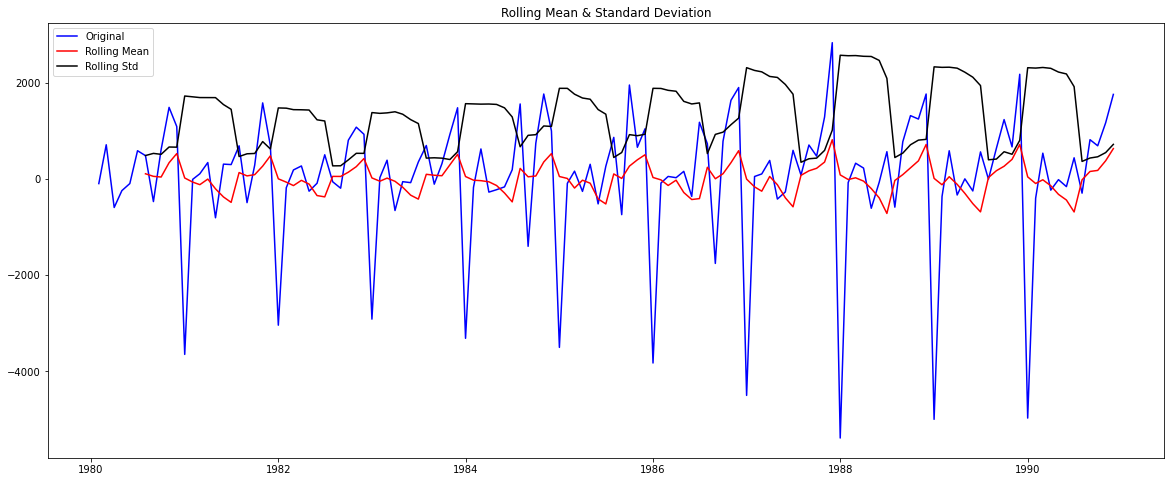

Results of Dickey-Fuller Test:
Test Statistic                 -8.01
p-value                         0.00
#Lags Used                     11.00
Number of Observations Used   119.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [501]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼
α
  = 0.05.

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [502]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

## Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [503]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [504]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [505]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit(disp=0)
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064372716052
ARIMA(0, 1, 2) - AIC:2232.783097684338
ARIMA(1, 1, 0) - AIC:2268.5280614409007
ARIMA(1, 1, 1) - AIC:2235.013945354085
ARIMA(1, 1, 2) - AIC:2233.5976471202684
ARIMA(2, 1, 0) - AIC:2262.0356009540687
ARIMA(2, 1, 1) - AIC:2232.360489902149
ARIMA(2, 1, 2) - AIC:2210.6215751505047


In [506]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param     AIC
8  (2, 1, 2) 2210.62
7  (2, 1, 1) 2232.36
2  (0, 1, 2) 2232.78
5  (1, 1, 2) 2233.60
4  (1, 1, 1) 2235.01
6  (2, 1, 0) 2262.04
1  (0, 1, 1) 2264.91
3  (1, 1, 0) 2268.53
0  (0, 1, 0) 2269.58

In [507]:
# Apply the ARIMA Model
# Top box -  Gives the overall summary
# Middle box -  Gives the coefficients and tells if the varibales are significant
# Lower box(Roots) - If the model is stable and good for forecasting.Between Imaginary & Real you draw a circle and check
# if the values/roots are inside the circle
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit(disp=0)

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.311
Method:                       css-mle   S.D. of innovations           1013.266
Date:                Sat, 19 Mar 2022   AIC                           2210.622
Time:                        13:15:43   BIC                           2227.873
Sample:                    02-01-1980   HQIC                          2217.632
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5850      0.518     10.774      0.000       4.569       6.601
ar.L1.D.Sparkling     1.2701      0.075     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

## Predict on the Test Set using this model and evaluate the model.

In [508]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [509]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.3364852048092


In [510]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE
ARIMA(2,1,2) 1374.34

In [515]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,1))

results_auto_ARIMA = auto_ARIMA.fit(disp=0)

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1111.180
Method:                       css-mle   S.D. of innovations           1148.861
Date:                Sat, 19 Mar 2022   AIC                           2232.360
Time:                        13:16:54   BIC                           2246.736
Sample:                    02-01-1980   HQIC                          2238.202
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2034      3.807      1.629      0.103      -1.259      13.665
ar.L1.D.Sparkling     0.5026      0.087      5.754      0.000       0.331       0.674
ar.L2.D.Sparkling    -0.

In [516]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [517]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1418.2161386019488


In [518]:
tempresultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])
resultsDf = pd.concat([resultsDf,tempresultsDf1])
resultsDf

RMSE
ARIMA(2,1,2) 1374.34
ARIMA(2,1,2) 1374.34
ARIMA(2,1,1) 1418.22

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

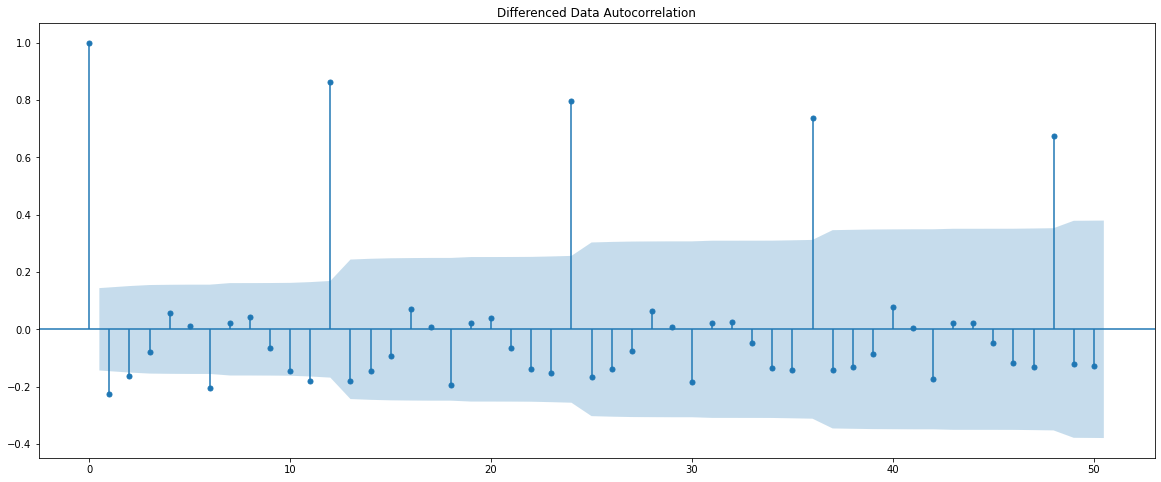

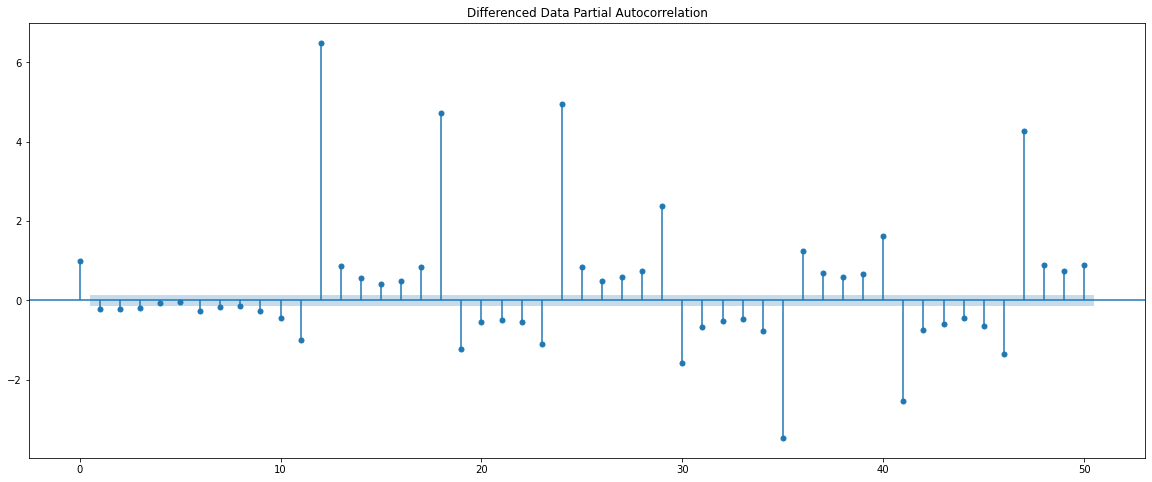

In [519]:
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.
The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [520]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(2,1,3))

results_manual_ARIMA = manual_ARIMA.fit(disp=0)

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1107.679
Method:                       css-mle   S.D. of innovations           1093.029
Date:                Sat, 19 Mar 2022   AIC                           2229.358
Time:                        13:17:29   BIC                           2249.484
Sample:                    02-01-1980   HQIC                          2237.536
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.8833      3.397      1.732      0.083      -0.775      12.542
ar.L1.D.Sparkling    -0.8782      0.077    -11.438      0.000      -1.029      -0.728
ar.L2.D.Sparkling    -0.

Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

### Predict on the Test Set using this model and evaluate the model.

In [521]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [522]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1393.6364310540207


In [523]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2) 1374.34
ARIMA(2,1,2) 1374.34
ARIMA(2,1,1) 1418.22
ARIMA(2,1,3) 1393.64

We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

### Build an Automated version of an SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

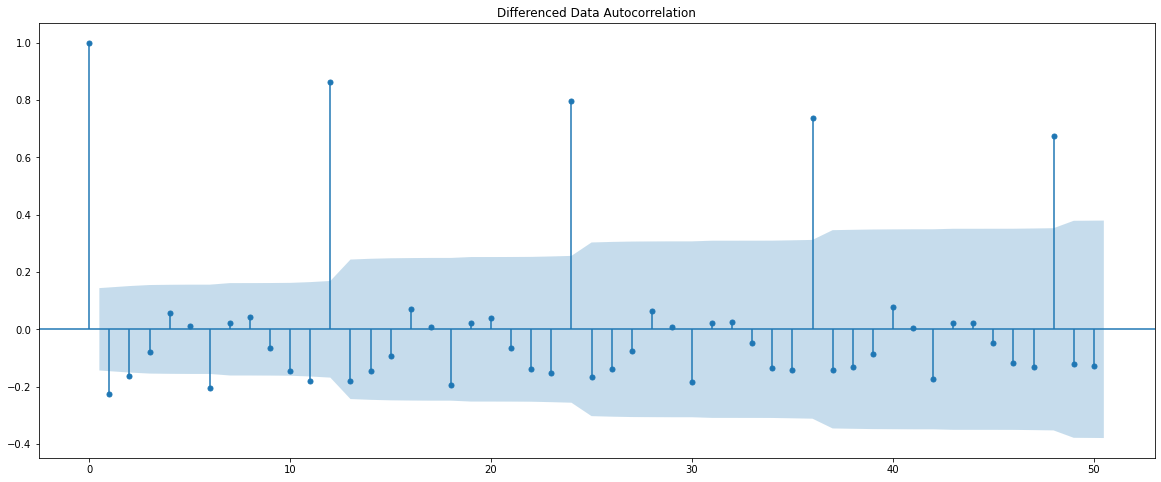

In [524]:
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [525]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [526]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [527]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000,disp=0)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553688869
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443132
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123060285
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510504
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565647
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.56528590828
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339540936
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298142886
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274791844
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104424029
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933280558
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6964509718225
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC

In [528]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal     AIC
53  (1, 1, 2)  (2, 0, 2, 6) 1727.68
26  (0, 1, 2)  (2, 0, 2, 6) 1727.89
80  (2, 1, 2)  (2, 0, 2, 6) 1729.36
17  (0, 1, 1)  (2, 0, 2, 6) 1741.70
44  (1, 1, 1)  (2, 0, 2, 6) 1743.37

In [529]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000,disp=0)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sat, 19 Mar 2022   AIC                           1727.679
Time:                                   13:18:49   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.257      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

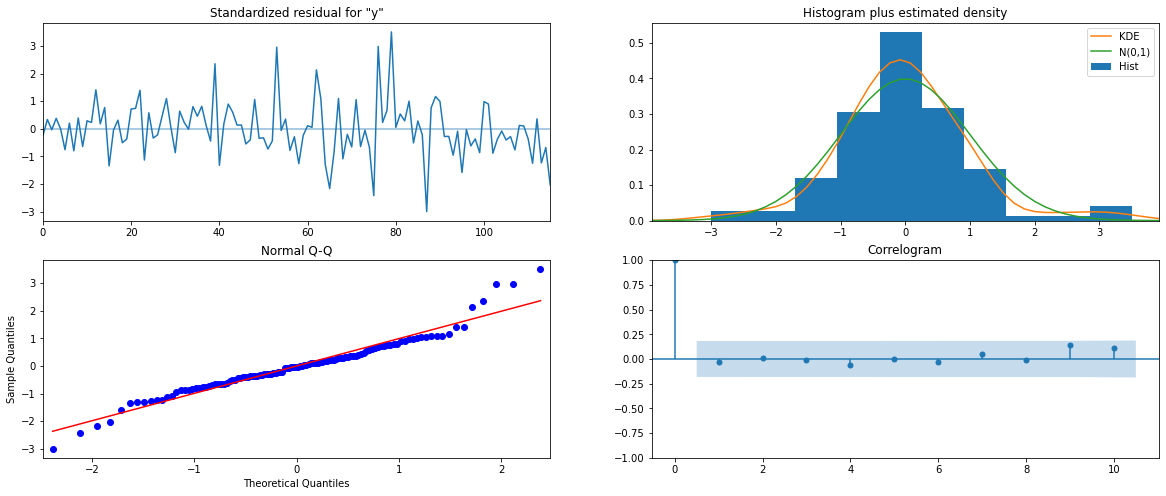

In [530]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [531]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

In [532]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.9586777963591


In [533]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)           1374.34
ARIMA(2,1,2)           1374.34
ARIMA(2,1,1)           1418.22
ARIMA(2,1,3)           1393.64
SARIMA(1,1,2)(2,0,2,6)  626.96

We see that we have a big drop in the RMSE value by including the seasonal parameters as well.

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [534]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [535]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [536]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000,disp=0)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234443
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456672
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791944
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861082
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920754
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566464
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957284438
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838555
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193740335
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144332806
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176164
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084897515
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824244179
SARIMA(0, 1, 

In [537]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal     AIC
50  (1, 1, 2)  (1, 0, 2, 12) 1555.58
53  (1, 1, 2)  (2, 0, 2, 12) 1555.93
26  (0, 1, 2)  (2, 0, 2, 12) 1557.12
23  (0, 1, 2)  (1, 0, 2, 12) 1557.16
77  (2, 1, 2)  (1, 0, 2, 12) 1557.34

In [538]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000,disp=0)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 19 Mar 2022   AIC                           1555.584
Time:                                    13:20:10   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

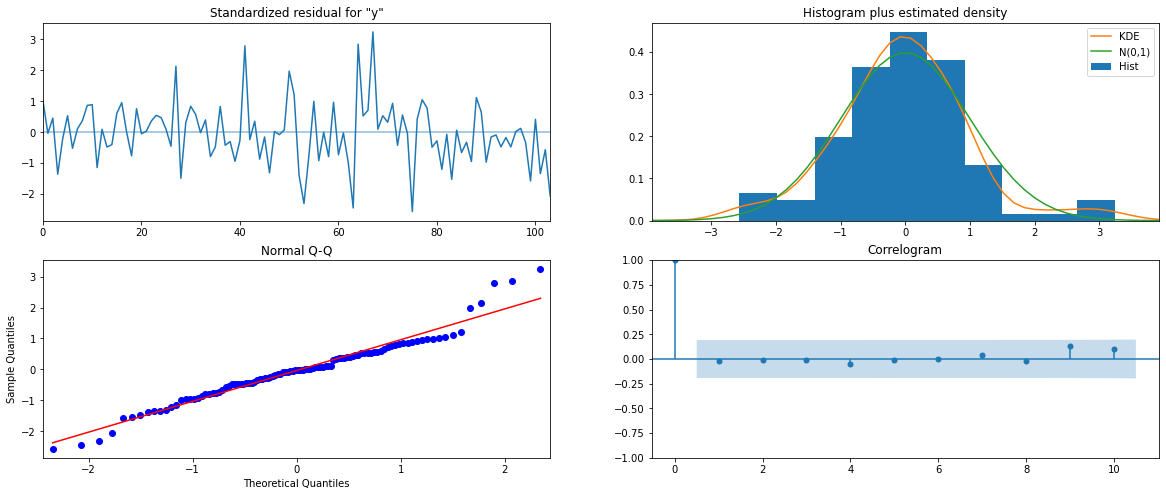

In [539]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model.

In [540]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [541]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1327.40   388.34         566.27        2088.54
1 1315.13   402.01         527.21        2103.05
2 1621.62   402.00         833.71        2409.52
3 1598.88   407.24         800.71        2397.05
4 1392.71   407.97         593.11        2192.31

In [542]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.591167953671


In [543]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)            1374.34
ARIMA(2,1,2)            1374.34
ARIMA(2,1,1)            1418.22
ARIMA(2,1,3)            1393.64
SARIMA(1,1,2)(2,0,2,6)   626.96
SARIMA(1,1,2)(1,0,2,12)  528.59

We see that the RMSE value have reduced further when the seasonality parameter was changed to 12.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

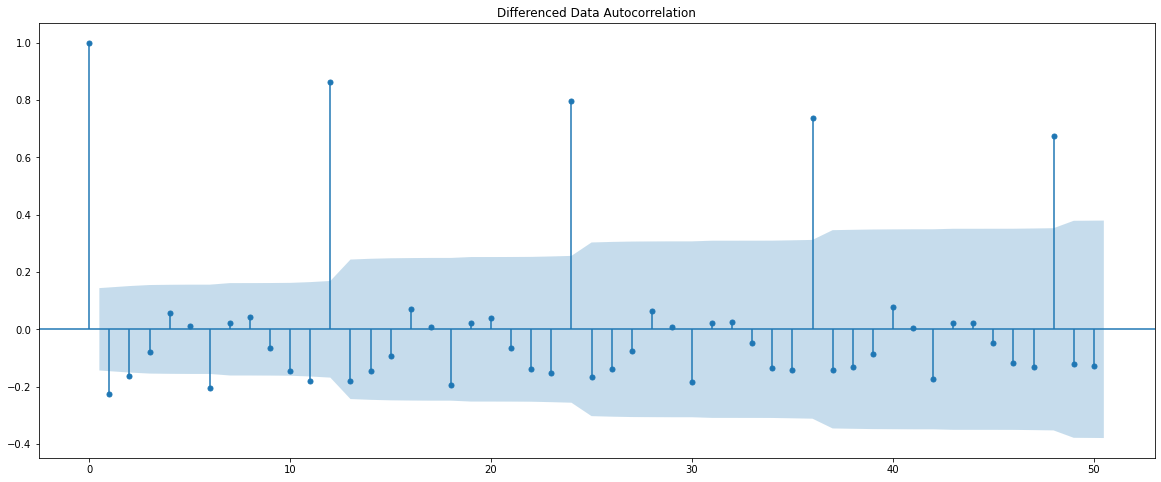

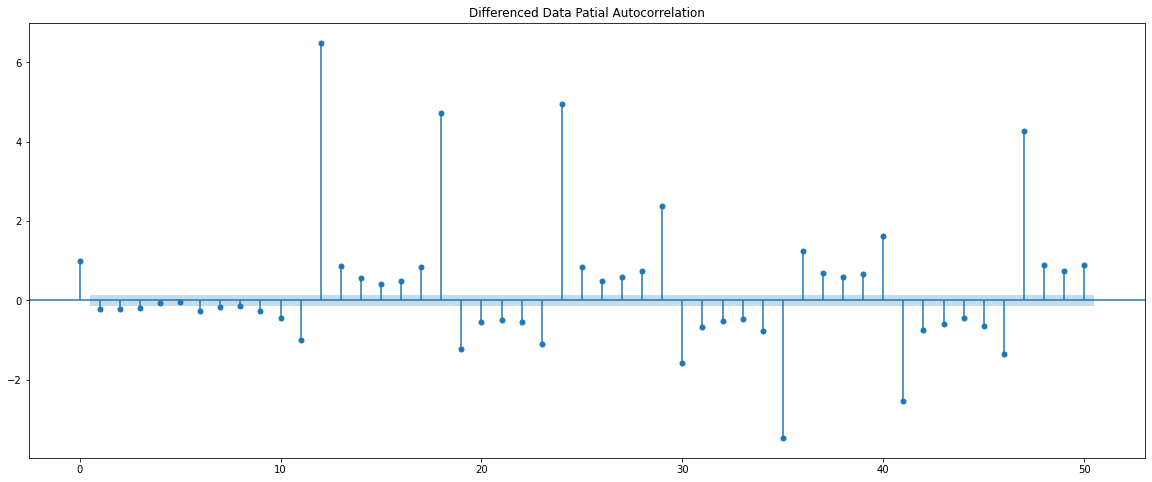

In [544]:
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

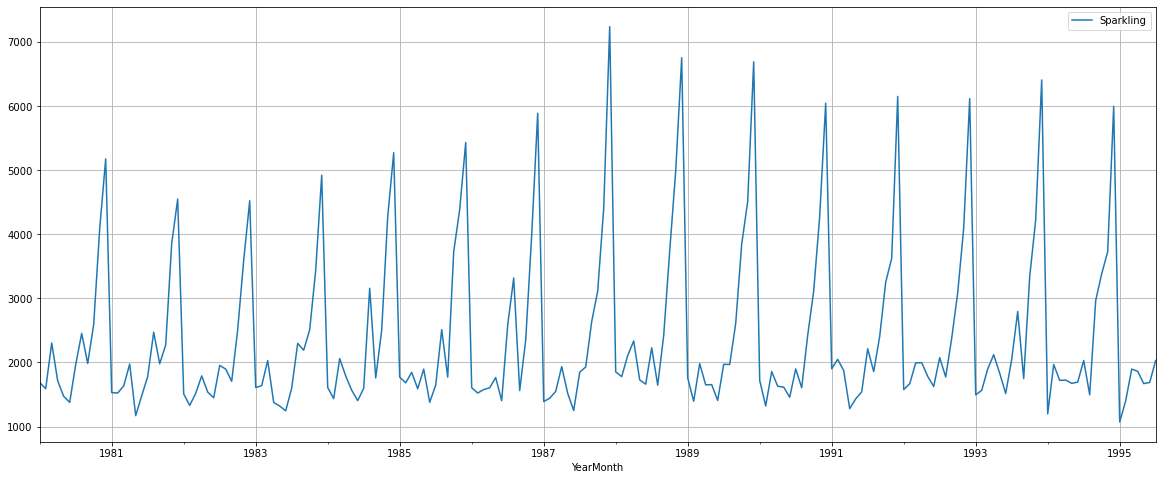

In [545]:
df_1.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

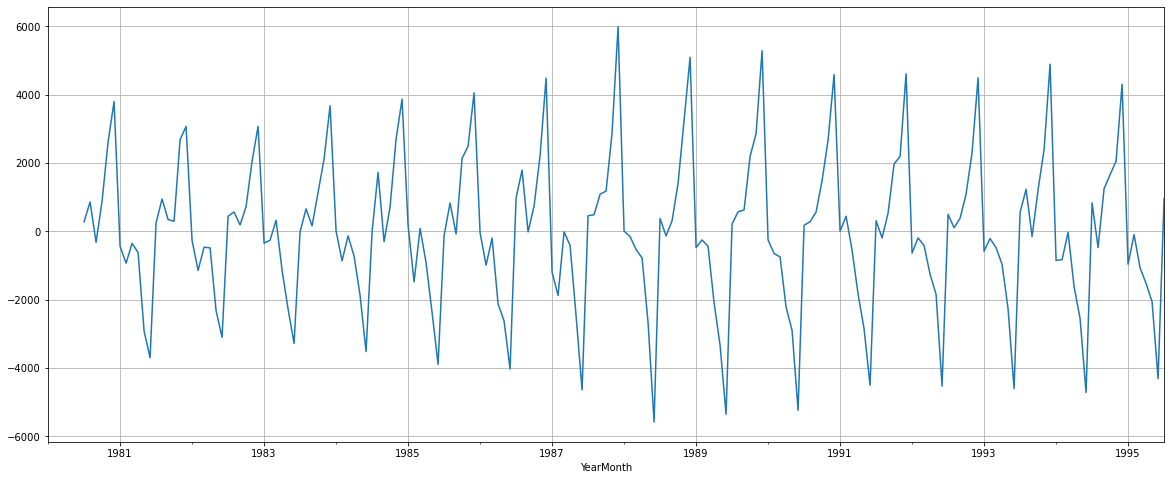

In [546]:
(df_1['Sparkling'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

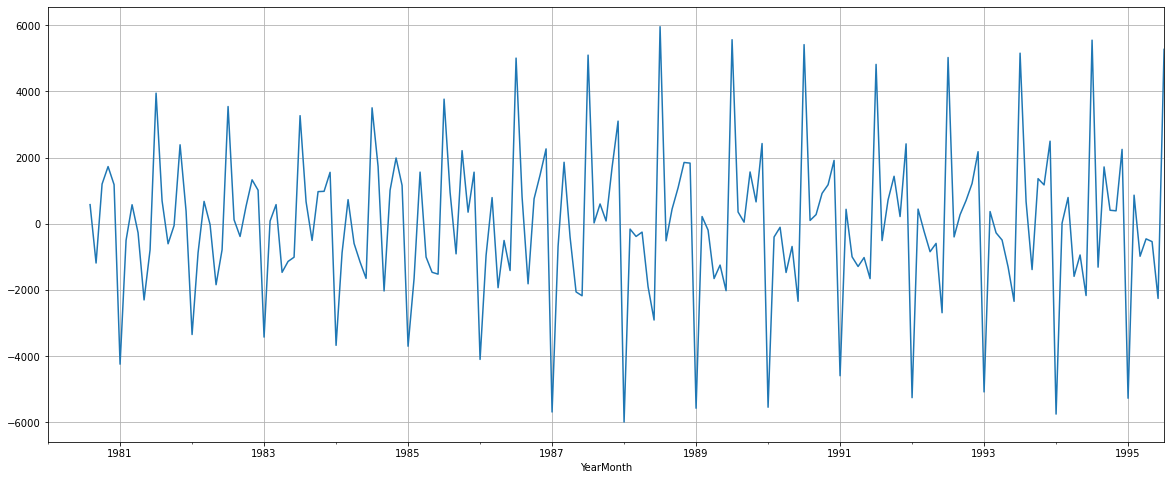

In [547]:
(df_1['Sparkling'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

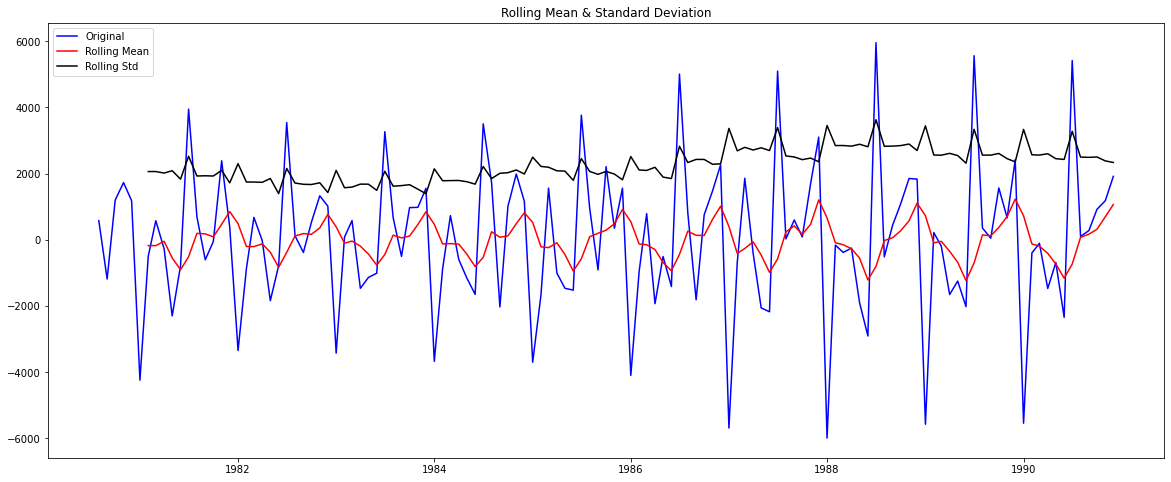

Results of Dickey-Fuller Test:
Test Statistic                 -7.02
p-value                         0.00
#Lags Used                     13.00
Number of Observations Used   111.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [548]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

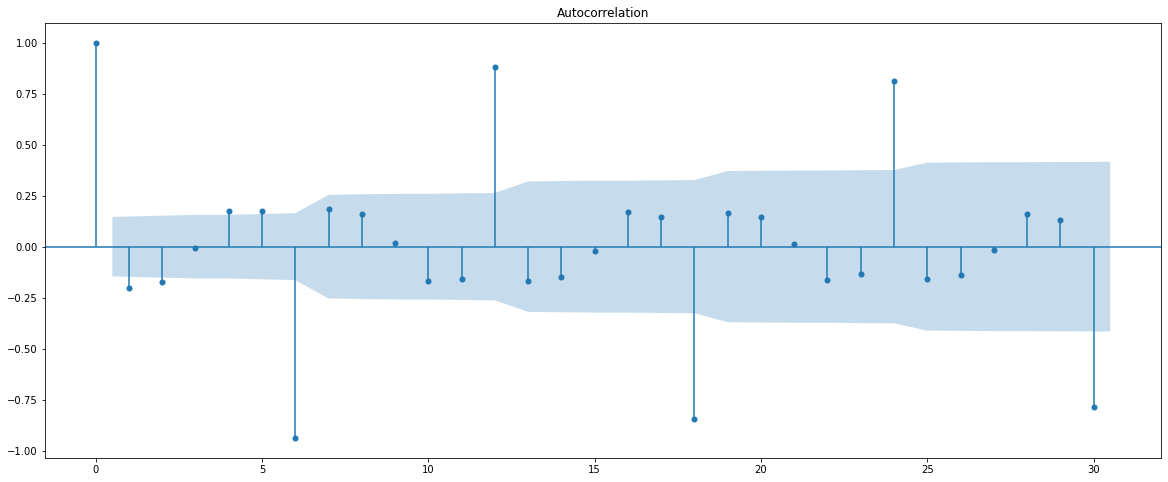

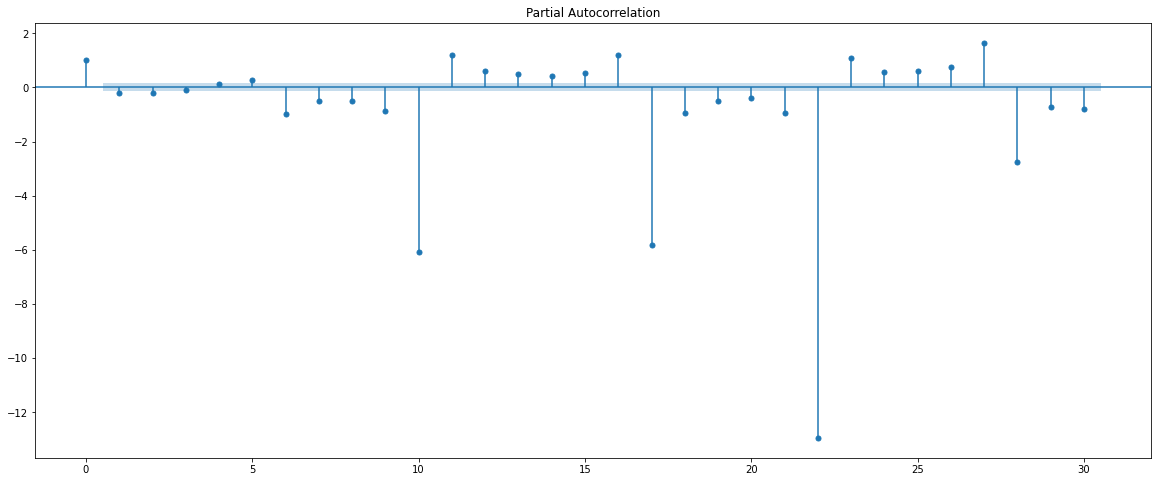

In [549]:
plot_acf((df_1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

## Here, we have taken alpha=0.05.
We are going to take the seasonal period as 12. We will keep the p(1) and q(1) parameters same as the ARIMA model.
The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.
This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.
Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

In [550]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2,1,2),
                                seasonal_order=(2, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000,disp=0)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3], 6)   Log Likelihood                -770.841
Date:                                   Sat, 19 Mar 2022   AIC                           1561.682
Time:                                           13:20:46   BIC                           1588.126
Sample:                                                0   HQIC                          1572.395
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7207      0.261     -2.760      0.006    

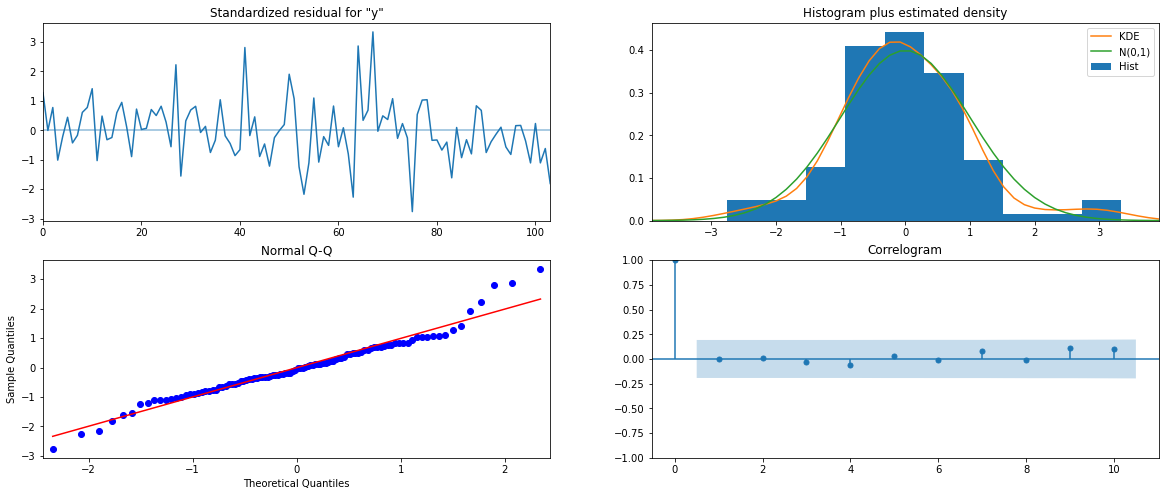

In [551]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [552]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [553]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1343.08   395.29         568.33        2117.82
1 1051.68   405.58         256.77        1846.60
2 1670.77   405.57         875.86        2465.68
3 1582.37   412.89         773.13        2391.61
4 1186.97   413.68         376.16        1997.77

In [554]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

803.5270509417298


In [555]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)            1374.34
ARIMA(2,1,2)            1374.34
ARIMA(2,1,1)            1418.22
ARIMA(2,1,3)            1393.64
SARIMA(1,1,2)(2,0,2,6)   626.96
SARIMA(1,1,2)(1,0,2,12)  528.59
SARIMA(2,1,2)(2,1,3,6)   803.53

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

In [565]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2,1,2),
                                seasonal_order=(2, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_6.fit(maxiter=1000,disp=0)
print(results_manual_SARIMA_12.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3], 6)   Log Likelihood                -770.841
Date:                                   Sat, 19 Mar 2022   AIC                           1561.682
Time:                                           13:24:01   BIC                           1588.126
Sample:                                                0   HQIC                          1572.395
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7207      0.261     -2.760      0.006    

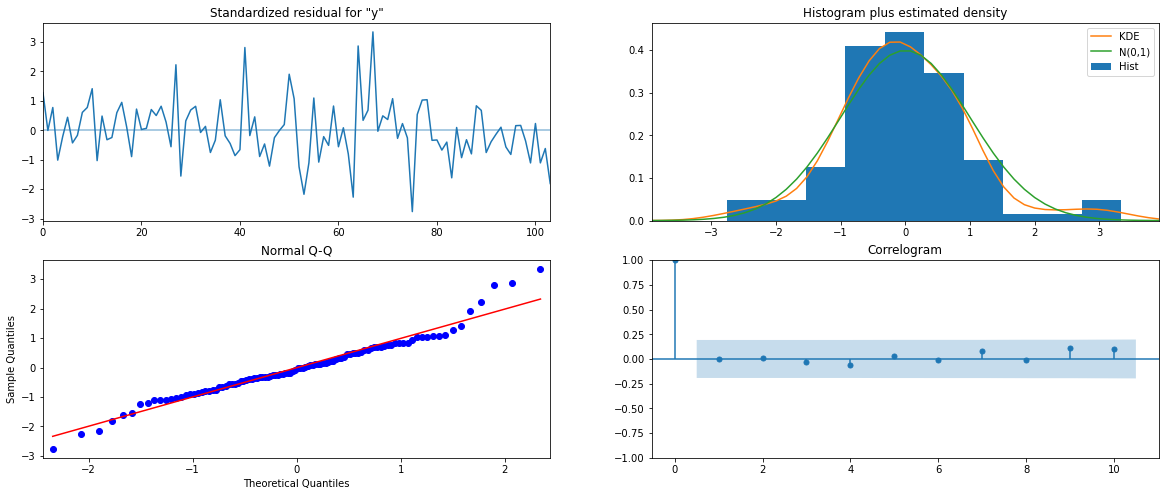

In [566]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [567]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [568]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1343.08   395.29         568.33        2117.82
1 1051.68   405.58         256.77        1846.60
2 1670.77   405.57         875.86        2465.68
3 1582.37   412.89         773.13        2391.61
4 1186.97   413.68         376.16        1997.77

In [569]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

803.5270509417298


In [570]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,1,3,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)            1374.34
ARIMA(2,1,2)            1374.34
ARIMA(2,1,1)            1418.22
ARIMA(2,1,3)            1393.64
SARIMA(1,1,2)(2,0,2,6)   626.96
SARIMA(1,1,2)(1,0,2,12)  528.59
SARIMA(2,1,2)(2,1,3,6)   803.53
SARIMA(2,1,2)(2,1,3,12)  803.53

## Building the most optimum model on the Full Data.

In [575]:
full_data_model = sm.tsa.statespace.SARIMAX(df_1['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000,disp=0)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sat, 19 Mar 2022   AIC                           2360.826
Time:                                    13:27:18   BIC                           2382.308
Sample:                                01-01-1980   HQIC                          2369.549
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6610      0.242     -2.733      0.006      -1.135      -0.187
ma.L1         -0.1802      0.219   

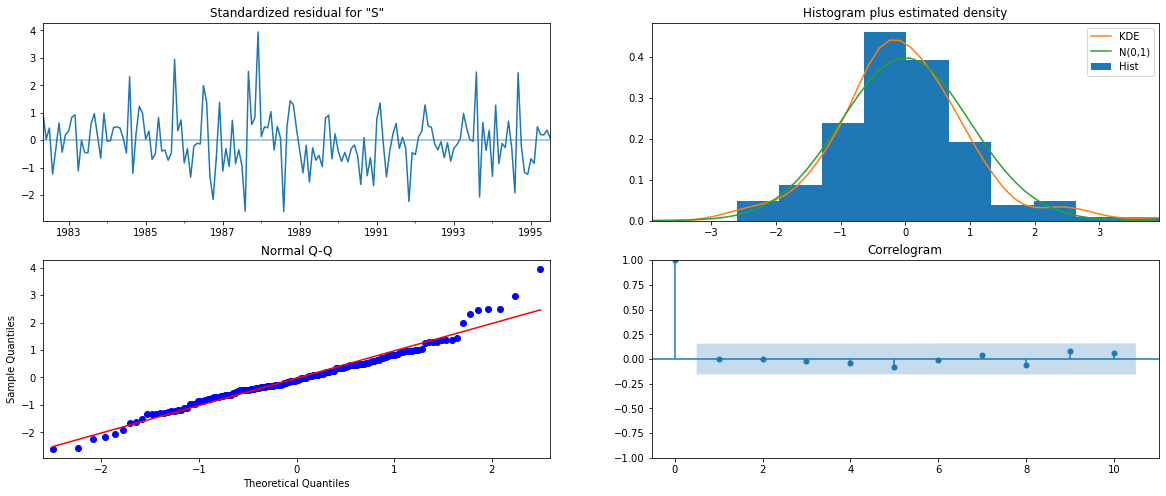

In [576]:
results_full_data_model.plot_diagnostics();

### Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

In [577]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=55)

In [578]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling     mean  mean_se  mean_ci_lower  mean_ci_upper
1995-08-01 1836.41   379.68        1092.25        2580.57
1995-09-01 2489.51   384.44        1736.02        3243.01
1995-10-01 3324.55   384.55        2570.85        4078.26
1995-11-01 4020.22   386.31        3263.08        4777.37
1995-12-01 6289.97   386.36        5532.71        7047.22

In [579]:
rmse = mean_squared_error(df_1['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9204293911006


In [580]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-1',end = '2000-03-1',freq='M'))

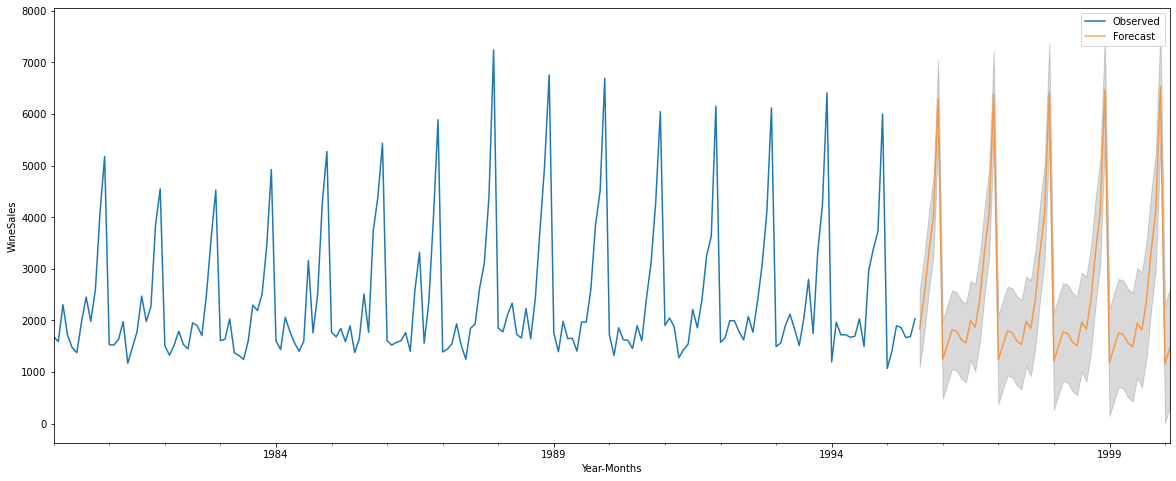

In [581]:
# plot the forecast along with the confidence band

axis = df_1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('WineSales')
plt.legend(loc='best')
plt.show()

In [582]:
resultsDf

RMSE
ARIMA(2,1,2)            1374.34
ARIMA(2,1,2)            1374.34
ARIMA(2,1,1)            1418.22
ARIMA(2,1,3)            1393.64
SARIMA(1,1,2)(2,0,2,6)   626.96
SARIMA(1,1,2)(1,0,2,12)  528.59
SARIMA(2,1,2)(2,1,3,6)   803.53
SARIMA(2,1,2)(2,1,3,12)  803.53